## Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
import plotly.graph_objects as go
import plotly.express as px
import folium
import random
import geopandas as gpd

## Lectura de los DataFrames

In [3]:
df_2018 = pd.read_csv('datos/Encuesta_de_gasto_turistico_2018-2022/gasto-turistico-2018/GASTO_TURISTICO_2018.csv',sep=';', encoding='latin-1')
df_2019 = pd.read_csv('datos/Encuesta_de_gasto_turistico_2018-2022/gasto-turistico-2019/GASTO_TURISTICO_2019.csv',sep=';', encoding='latin-1')
# enconding='latin-1' debido a que el decodificador uft-8 no es capaz de descodificar alfabeto latino y acentos diacriticos (tildes,ñ,ç,..)
df_2021 = pd.read_csv('datos/Encuesta_de_gasto_turistico_2018-2022/gasto-turistico-2021/GASTO_TURISTICO_2021.csv',sep=';',encoding='latin-1')
df_2022 = pd.read_csv('datos/Encuesta_de_gasto_turistico_2018-2022/gasto-turistico-2022/GASTO_TURISTICO_2022.csv',sep=';',encoding='latin-1')

df_2018.name = 'df_2018'
df_2019.name = 'df_2019'
df_2021.name = 'df_2021'
df_2022.name = 'df_2022'

df_list = [df_2018,df_2019,df_2021,df_2022]

df_total = pd.concat(df_list)

In [4]:
df_total_ini = df_total.copy()
df_total_ini['TRIMESTRE'] = df_total_ini['TRIMESTRE'].apply(lambda x: x[:4])

In [ ]:
df_total.groupby()

In [7]:
df_columns = df_2021[['AEROPUERTO_ORIGEN','PAIS_DESTINO','NACIONALIDAD','PAIS_RESIDENCIA','TRIMESTRE']]
df_columns

AEROPUERTO_ORIGEN PAIS_DESTINO NACIONALIDAD PAIS_RESIDENCIA TRIMESTRE
0                   ACE       CHE756       CHE756          CHE756    2021Q1
1                   ACE       DEU276       DEU276          DEU276    2021Q1
2                   ACE       BEL056       BEL056          BEL056    2021Q1
3                   ACE       BEL056       BEL056          BEL056    2021Q1
4                   ACE       BEL056       BEL056          BEL056    2021Q1
...                 ...          ...          ...             ...       ...
34258               TFS       GBR826       GBR826          GBR826    2021Q4
34259               TFS       ITA380       ITA380          ITA380    2021Q4
34260               TFS       ITA380       ITA380          ITA380    2021Q4
34261               TFS       GBR826       GBR826          GBR826    2021Q4
34262               TFS       NLD528       NLD528          NLD528    2021Q4

[34263 rows x 5 columns]

## Numero de turistas que han realizado la encuesta en cada Aeropuerto

Con esta información también podemos ver cuales son las islas "favoritas".

C:\Users\Oscar\AppData\Local\Temp\ipykernel_4284\944283522.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


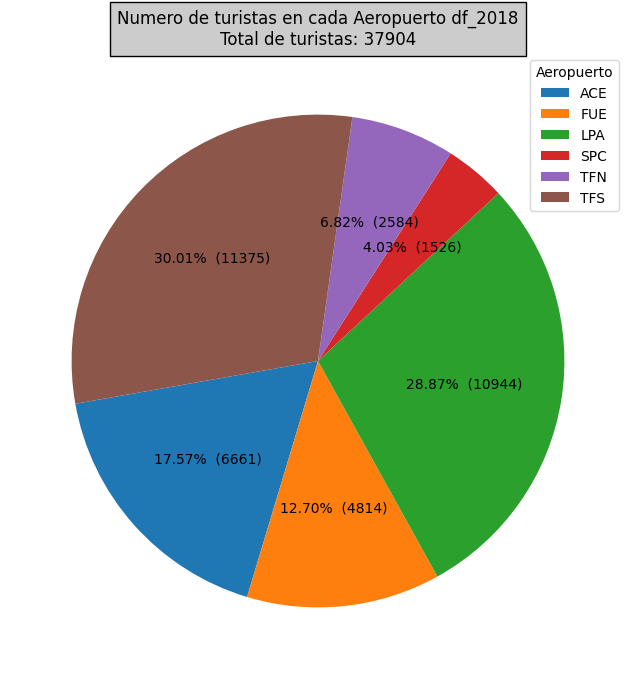

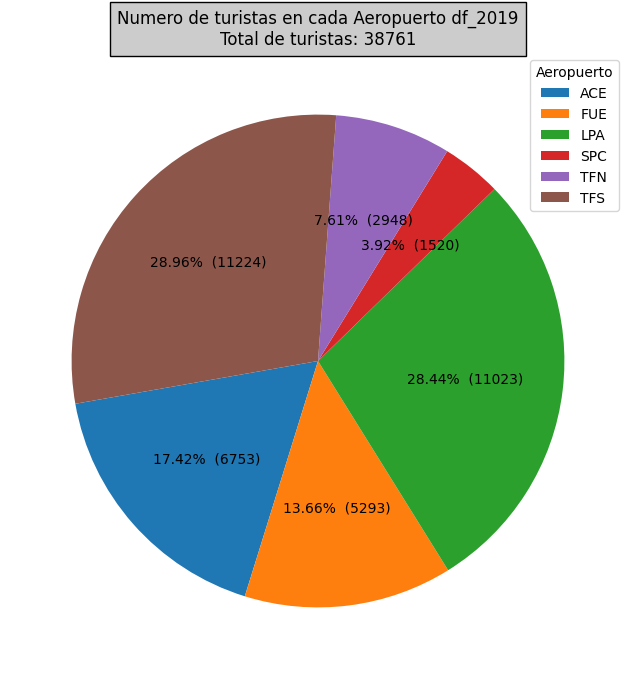

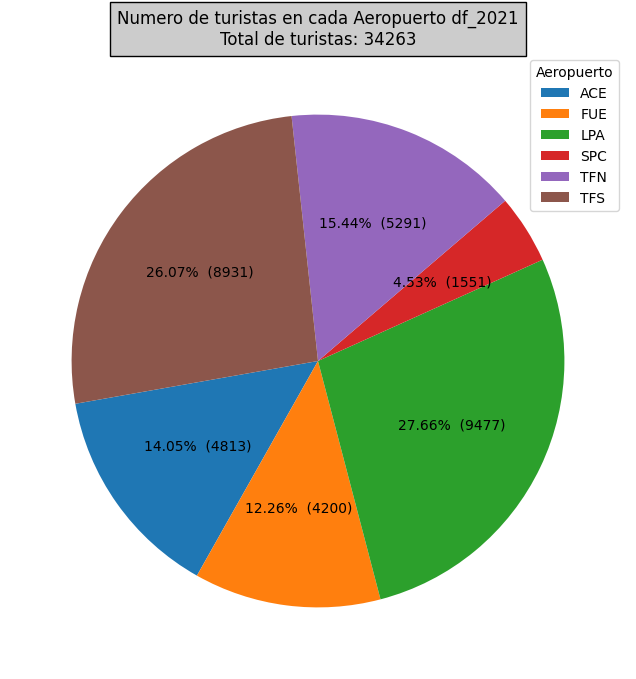

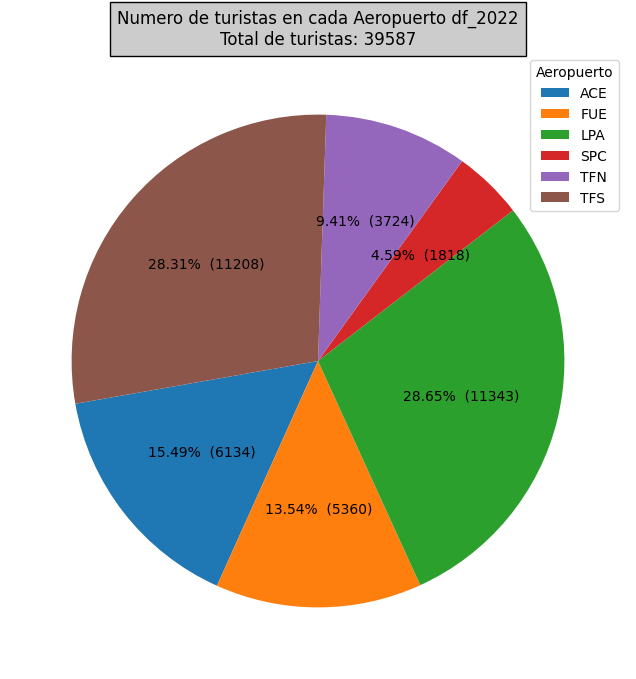

In [8]:
def make_autopct(values):
    def my_autopct(pct):
        total
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

for indx, i in enumerate(df_list):

    plt.figure(indx)
    df_columns = i[['AEROPUERTO_ORIGEN']]
    df_grouped = (df_columns.groupby(['AEROPUERTO_ORIGEN']).size())
    #print(df_grouped)

    values = list(df_grouped)
    total = sum(values)

#explode = (0.1, 0, 0, 0, 0, 0)

    plt.pie(df_grouped, startangle = 190, autopct=make_autopct(values))
    mylabels = ["ACE","FUE","LPA","SPC","TFN","TFS"]
    plt.legend(title = "Aeropuerto", labels=mylabels)
    plt.title("Numero de turistas en cada Aeropuerto " + i.name + "\n" + "Total de turistas: " + str(total), bbox={'facecolor':'0.8', 'pad':5})

    fig = plt.gcf()
    fig.set_size_inches(8,8)
fig.show()

## Numero de turistas segun pais de residencia en total

In [9]:
for i in df_list:
    print(i.name)
    df_tmp = i[['ID','PAIS_RESIDENCIA']]
    df_tmp = (df_tmp.groupby(['PAIS_RESIDENCIA']).count()).sort_values(by='ID',ascending=False)
    df_tmp.rename(columns = {'ID':'TURISTAS'}, inplace = True)
    print(df_tmp)
    print('\n')


df_2018
                 TURISTAS
PAIS_RESIDENCIA          
GBR826              10903
DEU276               6654
ESP724               6228
ZZZ900               2955
NLD528               1671
FRA250               1540
SWE752               1370
ITA380               1356
IRL372               1246
BEL056               1090
NOR578                939
DNK208                711
CHE756                621
FIN246                620


df_2019
                 TURISTAS
PAIS_RESIDENCIA          
GBR826              10582
ESP724               7065
DEU276               6907
ZZZ900               2934
FRA250               1714
NLD528               1545
IRL372               1426
SWE752               1364
ITA380               1354
BEL056               1053
NOR578                903
DNK208                735
CHE756                592
FIN246                587


df_2021
                 TURISTAS
PAIS_RESIDENCIA          
ESP724              10749
DEU276               5934
GBR826               4573
ZZZ900    

## Numero de turistas por nacionalidad por aeropuerto

C:\Users\Oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\plotting\_matplotlib\core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


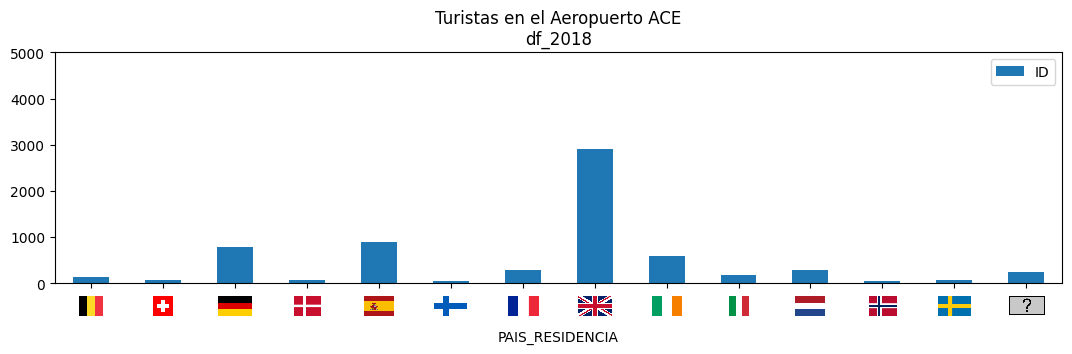

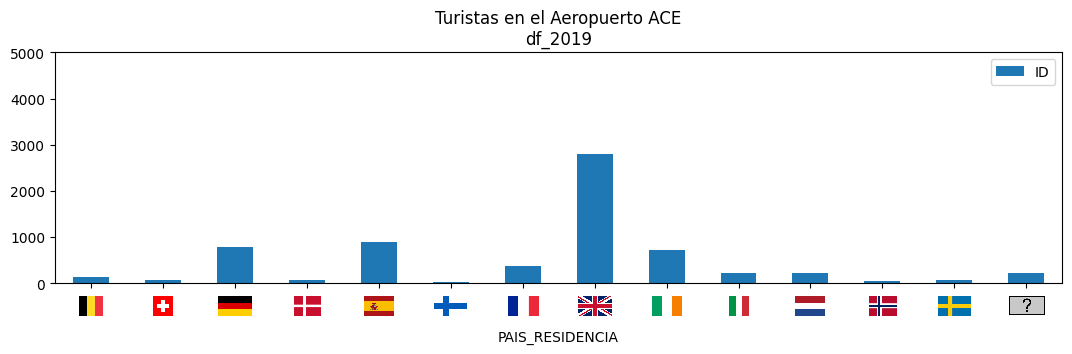

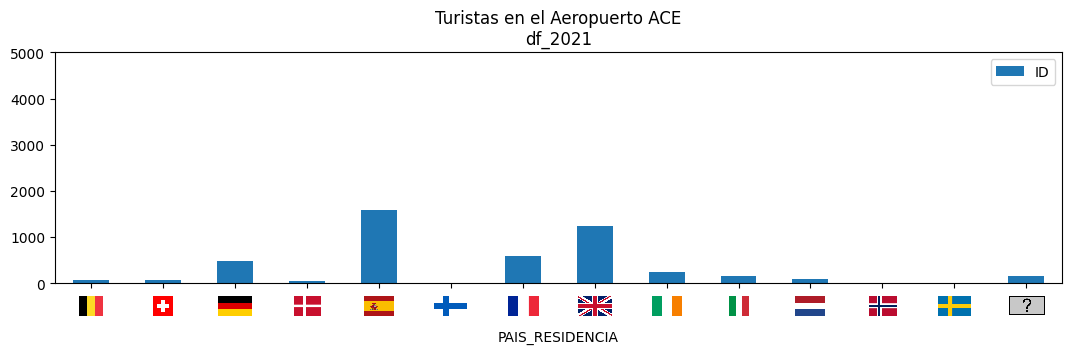

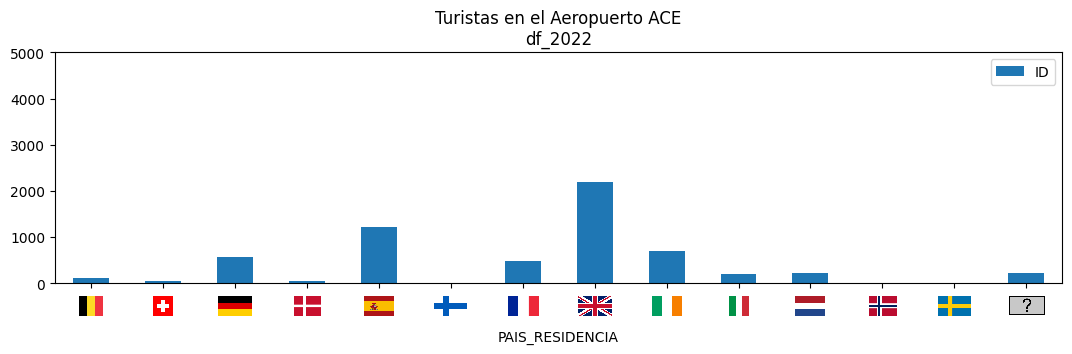

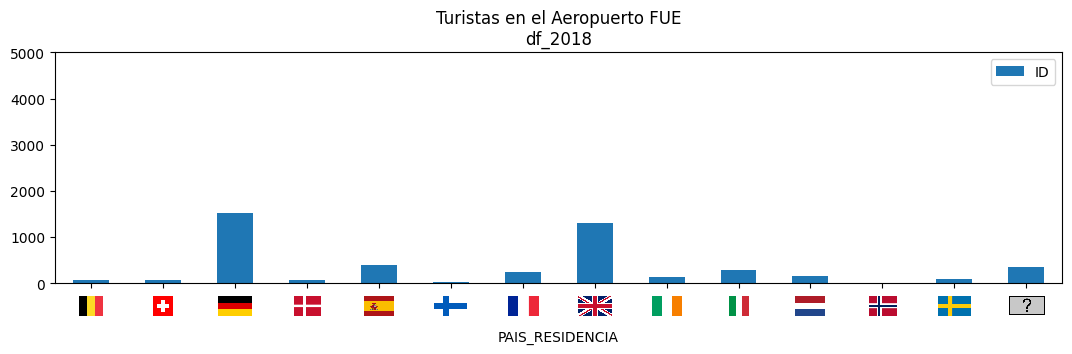

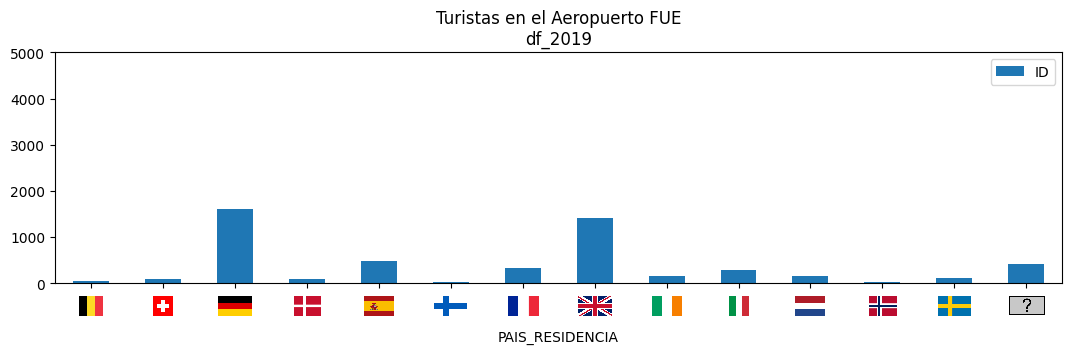

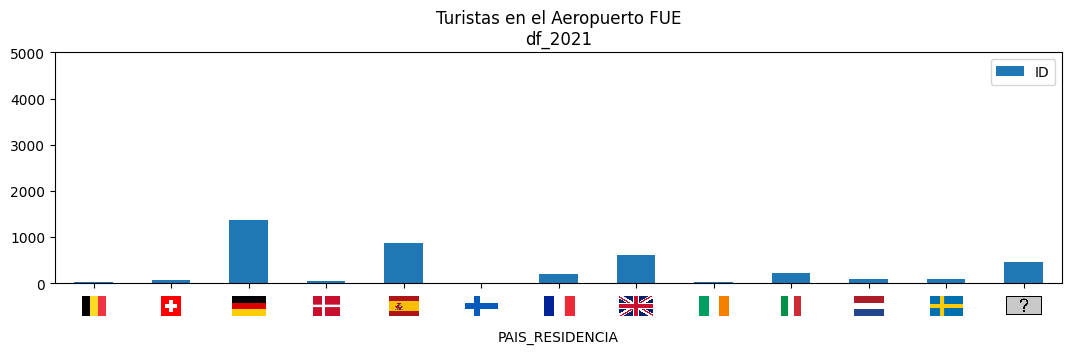

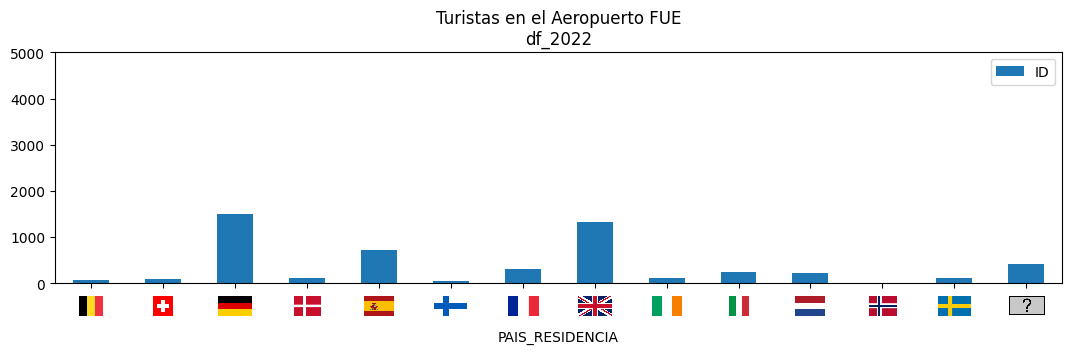

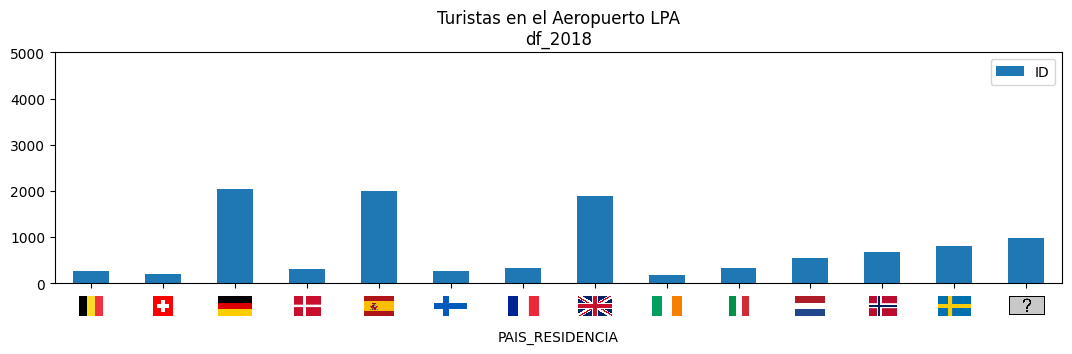

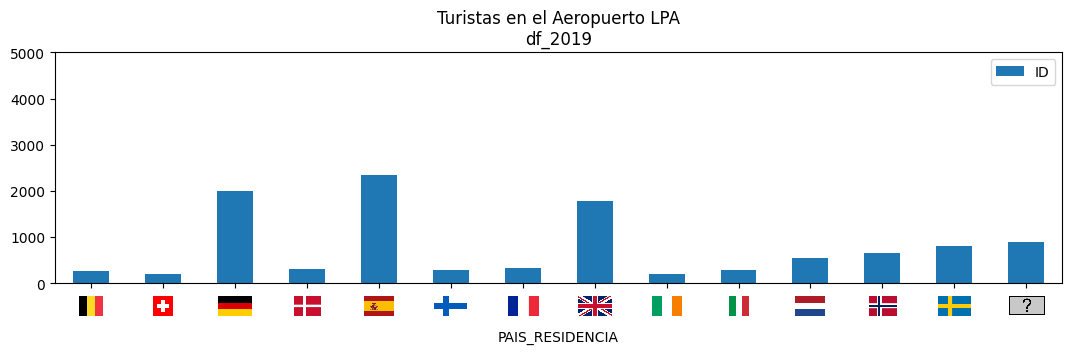

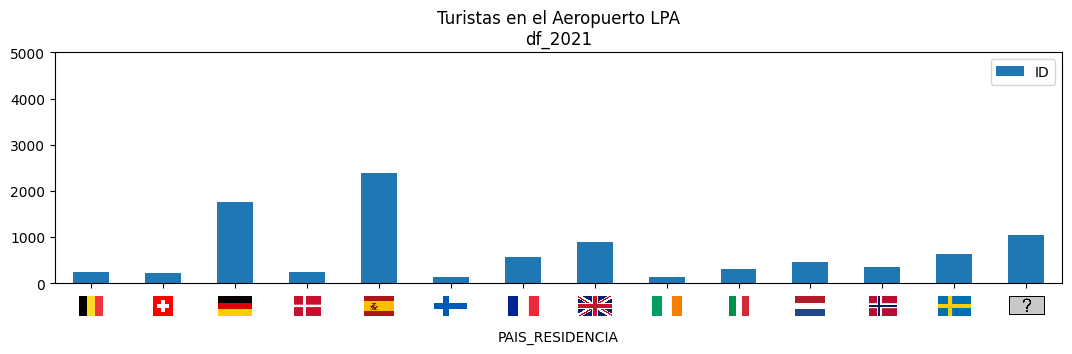

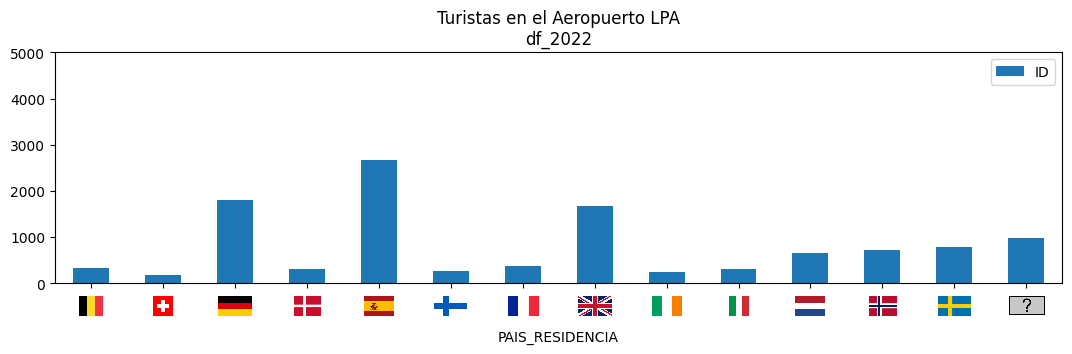

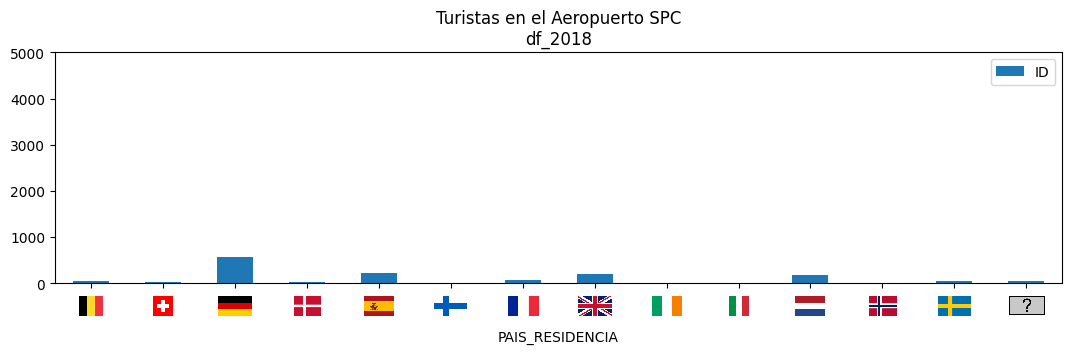

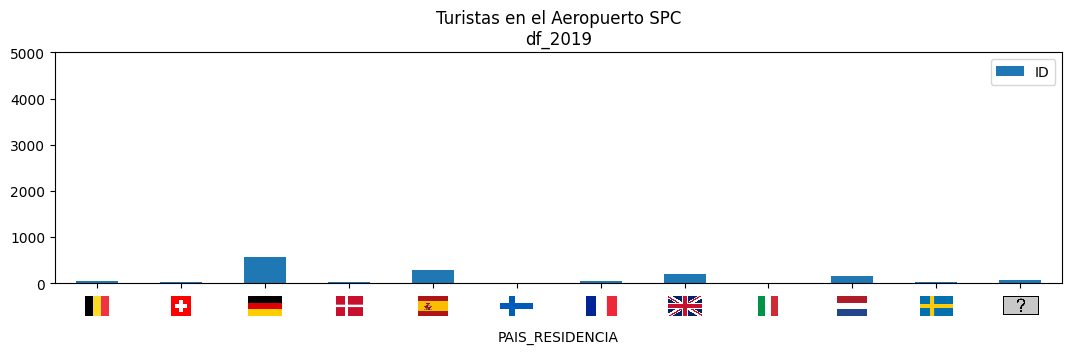

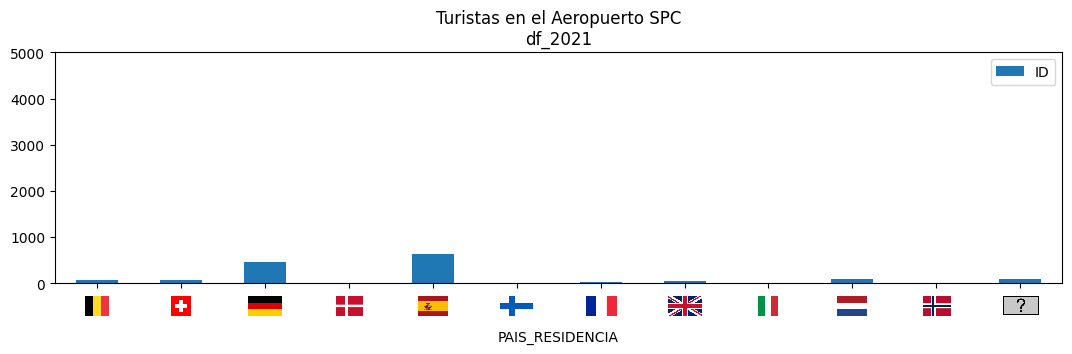

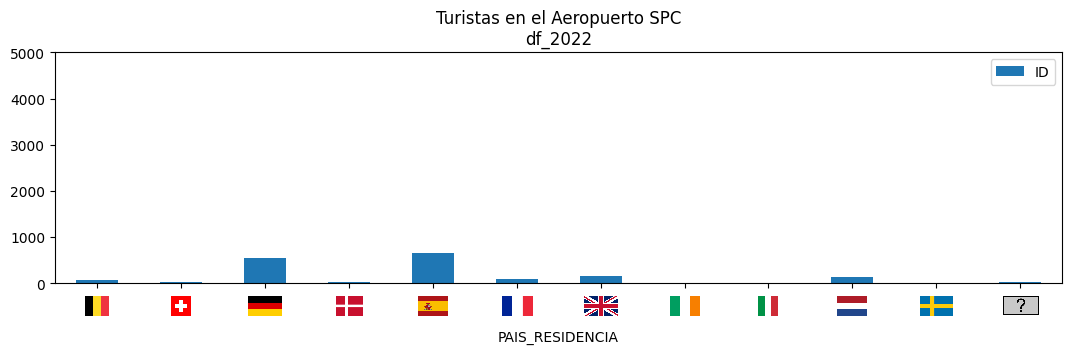

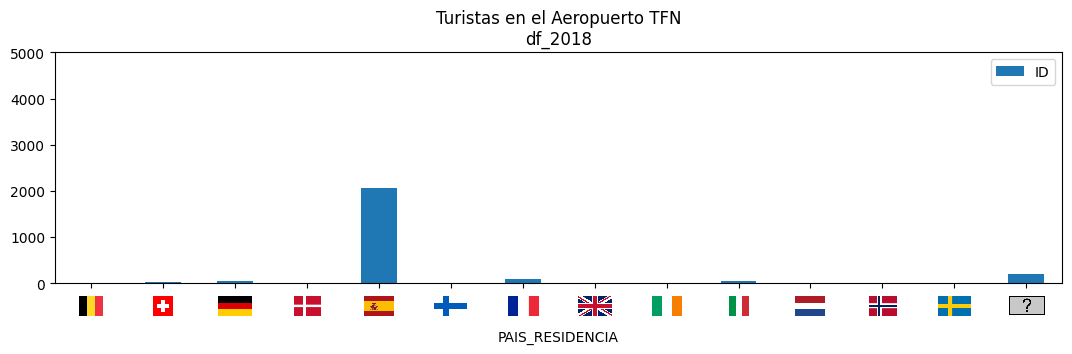

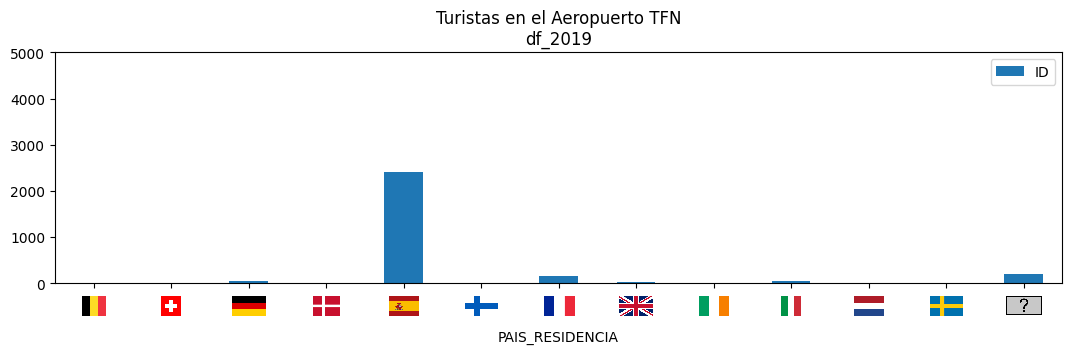

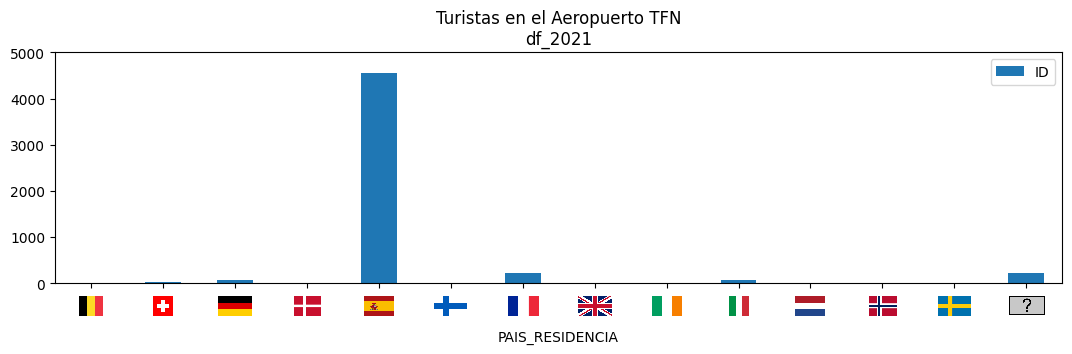

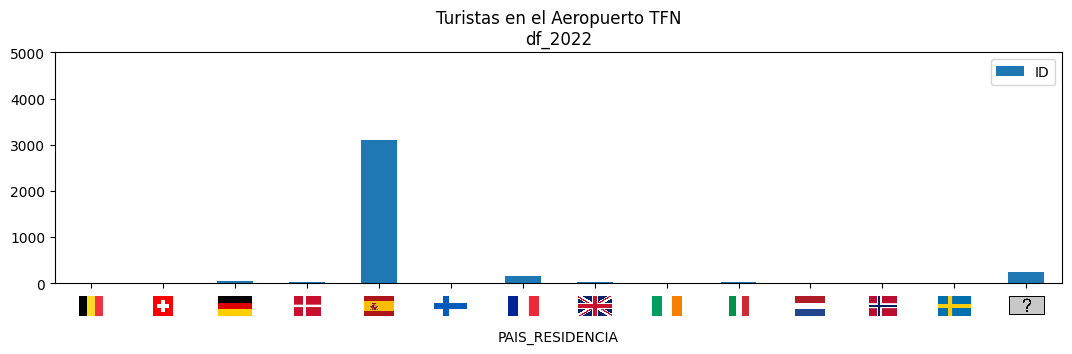

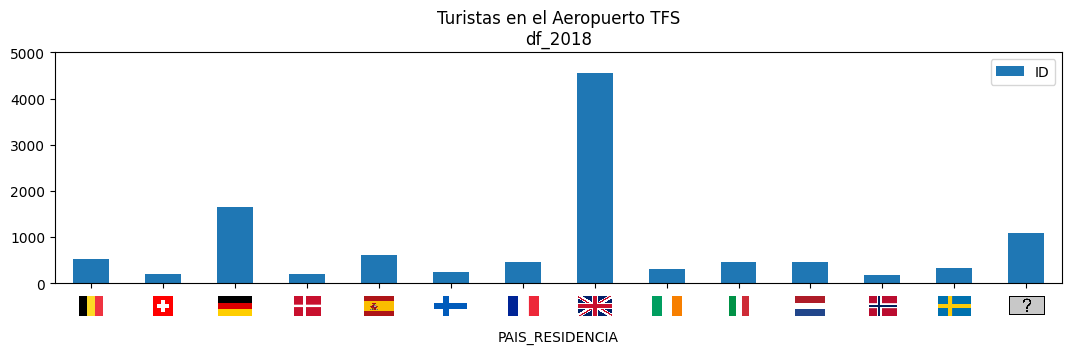

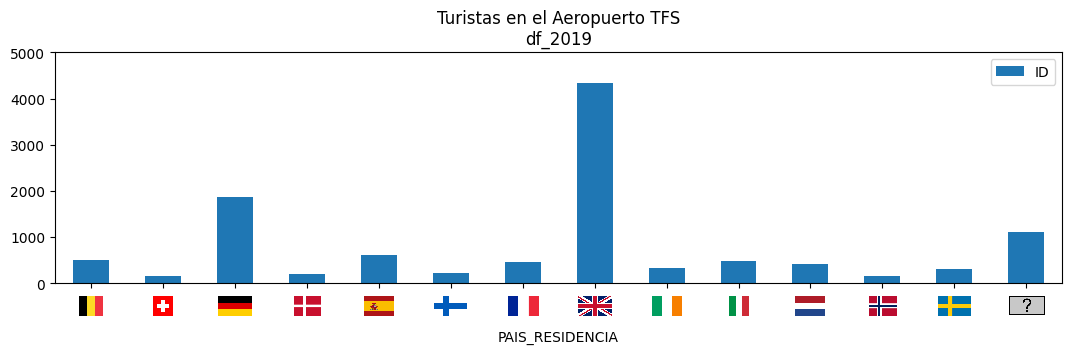

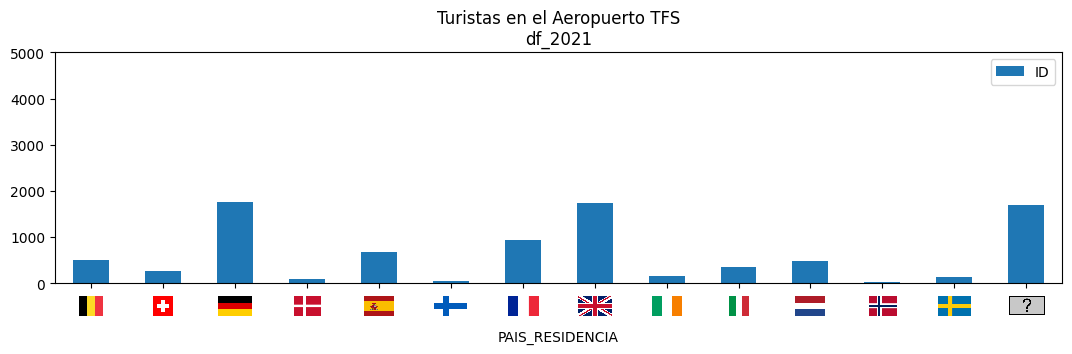

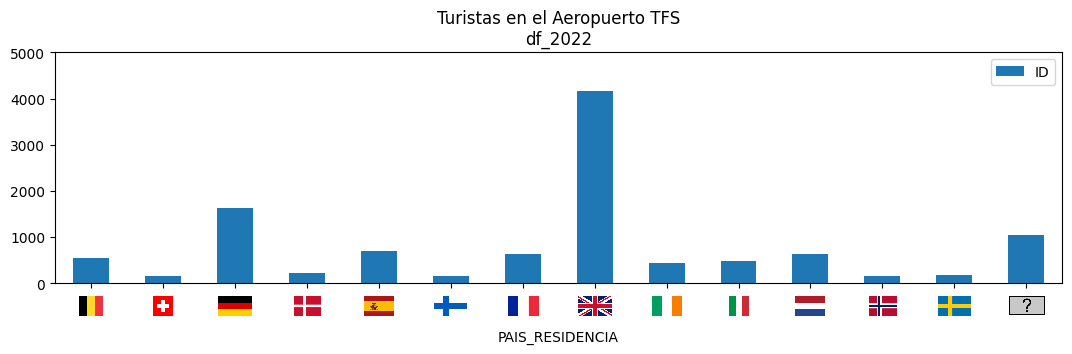

In [10]:
def get_flag(name):
    path = "datos/Encuesta_de_gasto_turistico_2018-2022/flags/{}.png".format(name)
    im = plt.imread(path,0)
    return im

def offset_image(coord, name, ax):
    img = get_flag(name)
    im = OffsetImage(img, zoom=0.03)
    im.image.axes = ax

    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -16.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)


islands = ["ACE","FUE","LPA","SPC","TFN","TFS"]

for i in islands:
    for j in df_list:
        df_tmp = j[['ID','AEROPUERTO_ORIGEN','PAIS_RESIDENCIA']]
        df_aeropuerto = df_tmp.loc[df_tmp['AEROPUERTO_ORIGEN'] == i]

        del df_aeropuerto['AEROPUERTO_ORIGEN']

        df_new = (df_aeropuerto.groupby(['PAIS_RESIDENCIA']).count())

        countries = df_new.index.to_list()

        ax = df_new.plot.bar(rot=0,figsize=(13,3),width=0.5,align="center")
        ax.tick_params(axis='x', which='major', pad=26)

        for ind, c in enumerate(countries):
            offset_image(ind, c, ax)

            ax.set_xticklabels([])
            ax.set_ylim([0,5000])
            plt.title('Turistas en el Aeropuerto ' + i + '\n' + j.name)
plt.show()


## Edad Minima

In [11]:
edad_minima = float("inf")

for archivo_csv in df_list:
    edad_minima_df = archivo_csv["EDAD"].min()
    if edad_minima_df < edad_minima:
        edad_minima = edad_minima_df

print("La edad mínima en toda la lista de data sets es:", edad_minima)

La edad mínima en toda la lista de data sets es: 16


## Edad Maxima

In [12]:
edad_maxima = 0

for archivo_csv in df_list:
    edad_maxima_df = archivo_csv["EDAD"].max()
    if edad_maxima_df > edad_maxima:
        edad_maxima = edad_maxima_df

print("La edad maxima en toda la lista de data sets es:", edad_maxima)

La edad maxima en toda la lista de data sets es: 99


##  Perfil por pais de residencia por gasto desglosado

In [13]:
# Juntar cada concepto con sus repectivas columnas
alojamientoDesglose = ["DESGLOSE_EXTRA_ALOJ"]
transporteDesglose = ["DESGLOSE_PASAJES_ISLAS", "DESGLOSE_TAXI", "DESGLOSE_ALQ_VEHIC", "DESGLOSE_TRANSP_PUBLICO"]
alimentacionDesglose = ["DESGLOSE_ALIM_SUPER", "DESGLOSE_RESTAURANT"]
ocioDesglose = ["DESGLOSE_EXCURS_ORGANIZ", "DESGLOSE_DEPORTES", "DESGLOSE_ACTIV_CULTURAL", "DESGLOSE_MUSEOS", "DESGLOSE_PARQUES_OCIO", "DESGLOSE_DISCOTECAS", "DESGLOSE_SALUD"]
compradebienesDesglose = ["DESGLOSE_SOUVENIRS", "DESGLOSE_BIENES_INMUEBLES", "DESGLOSE_OTRAS_COMPRAS"]
otrosDesglose = ["DESGLOSE_FARMACIA", "DESGLOSE_OTROS_GASTOS"]

allDesglose = ['PAIS_RESIDENCIA', 'GASTO_EUROS','DESGLOSE_EXTRA_ALOJ', 'DESGLOSE_PASAJES_ISLAS', 'DESGLOSE_TAXI',
                      'DESGLOSE_ALQ_VEHIC', 'DESGLOSE_TRANSP_PUBLICO', 'DESGLOSE_ALIM_SUPER',
                      'DESGLOSE_RESTAURANT', 'DESGLOSE_EXCURS_ORGANIZ', 'DESGLOSE_DEPORTES',
                      'DESGLOSE_ACTIV_CULTURAL', 'DESGLOSE_MUSEOS', 'DESGLOSE_PARQUES_OCIO',
                      'DESGLOSE_DISCOTECAS', 'DESGLOSE_SALUD', 'DESGLOSE_SOUVENIRS',
                      'DESGLOSE_BIENES_INMUEBLES', 'DESGLOSE_OTRAS_COMPRAS',
                      'DESGLOSE_FARMACIA', 'DESGLOSE_OTROS_GASTOS']

In [14]:
# separar por rangos de edades
edades_16_25 = []
edades_26_45 = []
edades_46_65 = []
edades_66_99 = []


for archivo_csv in df_list:
    edades_16_25.append(pd.DataFrame(archivo_csv[(archivo_csv["EDAD"] >= 16) & (archivo_csv["EDAD"] <= 25)])[allDesglose])
    edades_26_45.append(pd.DataFrame(archivo_csv[(archivo_csv["EDAD"] >= 26) & (archivo_csv["EDAD"] <= 45)])[allDesglose])
    edades_46_65.append(pd.DataFrame(archivo_csv[(archivo_csv["EDAD"] >= 46) & (archivo_csv["EDAD"] <= 65)])[allDesglose])
    edades_66_99.append(pd.DataFrame(archivo_csv[(archivo_csv["EDAD"] >= 66) & (archivo_csv["EDAD"] <= 99)])[allDesglose])

main_edades = [edades_16_25, edades_26_45, edades_46_65, edades_66_99]




for idx, edad in enumerate(main_edades):
    for idx1, dataframe in enumerate(edad):
        dataframe = dataframe[allDesglose].replace(',', '.', regex=True)
        edad[idx1] = pd.DataFrame(dataframe)
    main_edades[idx] = edad


for idx, edades_grupo in enumerate(main_edades):
    for idx1, df_anio in enumerate(edades_grupo):
        df_anio['ALOJAMIENTO'] = df_anio.DESGLOSE_EXTRA_ALOJ.astype(float) * df_anio.GASTO_EUROS.astype(float) / 100
        df_anio['TRANSPORTE'] = (df_anio.DESGLOSE_PASAJES_ISLAS.astype(float) + df_anio.DESGLOSE_TAXI.astype(float) + 
                                    df_anio.DESGLOSE_TRANSP_PUBLICO.astype(float) + df_anio.DESGLOSE_ALQ_VEHIC.astype(float)) * df_anio.GASTO_EUROS.astype(float) / 100
        df_anio['ALIMENTACION'] = (df_anio.DESGLOSE_ALIM_SUPER.astype(float) + df_anio.DESGLOSE_RESTAURANT.astype(float)) * df_anio.GASTO_EUROS.astype(float) / 100
        df_anio['OCIO'] = (df_anio.DESGLOSE_EXCURS_ORGANIZ.astype(float) + df_anio.DESGLOSE_DEPORTES.astype(float) + df_anio.DESGLOSE_ACTIV_CULTURAL.astype(float) + 
                                df_anio.DESGLOSE_MUSEOS.astype(float) + df_anio.DESGLOSE_PARQUES_OCIO.astype(float) + df_anio.DESGLOSE_DISCOTECAS.astype(float) + 
                                df_anio.DESGLOSE_SALUD.astype(float)) * df_anio.GASTO_EUROS.astype(float) / 100
        df_anio['COMPRA_BIENES'] = (df_anio.DESGLOSE_SOUVENIRS.astype(float) + df_anio.DESGLOSE_BIENES_INMUEBLES.astype(float) + 
                                        df_anio.DESGLOSE_OTRAS_COMPRAS.astype(float)) * df_anio.GASTO_EUROS.astype(float) / 100
        df_anio['OTROS'] = (df_anio.DESGLOSE_FARMACIA.astype(float) + df_anio.DESGLOSE_OTROS_GASTOS.astype(float)) * df_anio.GASTO_EUROS.astype(float) / 100
        df_anio['TOTAL'] =  df_anio['ALOJAMIENTO'] + df_anio['TRANSPORTE'] + df_anio['ALIMENTACION'] + df_anio['OCIO'] + df_anio['COMPRA_BIENES'] + df_anio['OTROS']
        edades_grupo[idx1] = df_anio
    main_edades[idx] = edades_grupo

new_columns = ['PAIS_RESIDENCIA', 'ALOJAMIENTO', 'TRANSPORTE', 'ALIMENTACION', 'OCIO', 'COMPRA_BIENES', 'OTROS', 'TOTAL']

for idx, edades_grupo in enumerate(main_edades):
    for idx1, df_anio in enumerate(edades_grupo):
        edades_grupo[idx1] = edades_grupo[idx1][new_columns]
    main_edades[idx] = edades_grupo

for idx, edades in enumerate(main_edades):
    for idx1, anio in enumerate(edades):

        anio = anio.groupby(['PAIS_RESIDENCIA']).mean()
        edades[idx1] = anio
    main_edades[idx] = edades

edades = ["16-25", "26-45", "46-65", "66+"]
anio =   ["2018", "2019", "2021", "2022"]

main_edades[0][0]




ALOJAMIENTO  TRANSPORTE  ALIMENTACION        OCIO   
PAIS_RESIDENCIA                                                      
BEL056              8.946746  103.514974    134.952707  100.257941  \
CHE756              4.900708  117.523485    267.071790  109.050814   
DEU276             10.633346  159.346254    202.994336   92.801784   
DNK208             21.583731  156.602859    302.500925   51.630583   
ESP724             24.769271  100.993022    200.009939   85.935214   
FIN246              8.571548  162.084787    329.727262   63.781595   
FRA250             49.436546  134.743095    150.830576  159.289445   
GBR826             20.532628   91.682565    292.168452  105.529302   
IRL372             38.013791   88.890385    486.956529  169.587788   
ITA380             29.107154  110.671689    290.010200   88.139570   
NLD528             22.504052  131.696998    294.416267  100.558955   
NOR578             13.811404  123.613447    568.120634  200.932031   
SWE752             11.000706  125.306962    351.465865   42.369905   
ZZZ900             26.689002  122.262191    276.625335  106.449050   

                 COMPRA_BIENES      OTROS        TOTAL  
PAIS_RESIDENCIA                                         
BEL056               94.345590  11.355847   453.373807  
CHE756               89.346938   6.570034   594.463767  
DEU276              259.241609  11.098036   736.115365  
DNK208               94.578297  10.564578   637.460973  
ESP724               61.790417  10.099957   483.597819  
FIN246              142.254650   0.971429   707.391271  
FRA250               70.971660  10.033610   575.304932  
GBR826               95.486289  26.226037   631.625272  
IRL372              100.459772  20.329513   904.237778  
ITA380               67.031058  11.329885   596.289556  
NLD528               61.009195  22.455240   632.640707  
NOR578              128.547422   8.939536  1043.964474  
SWE752              179.714743  10.571065   720.429245  
ZZZ900              152.485490  12.281128   696.792196

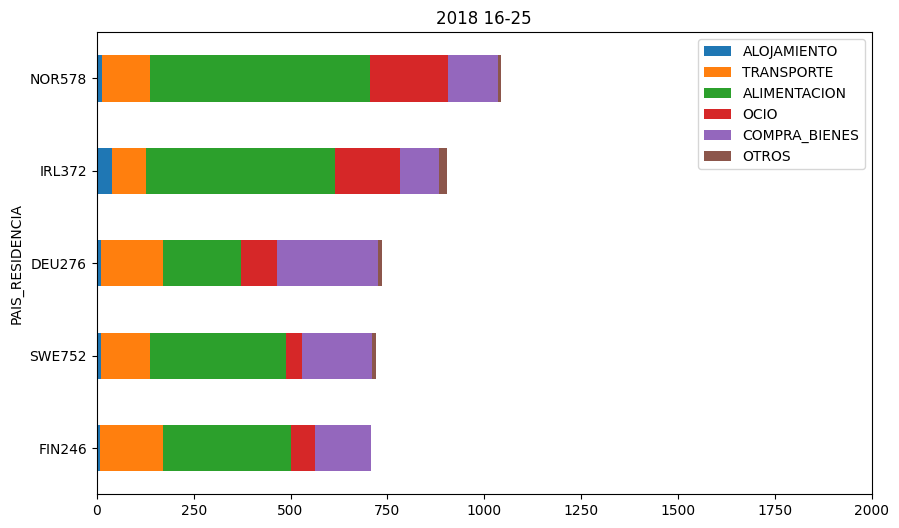

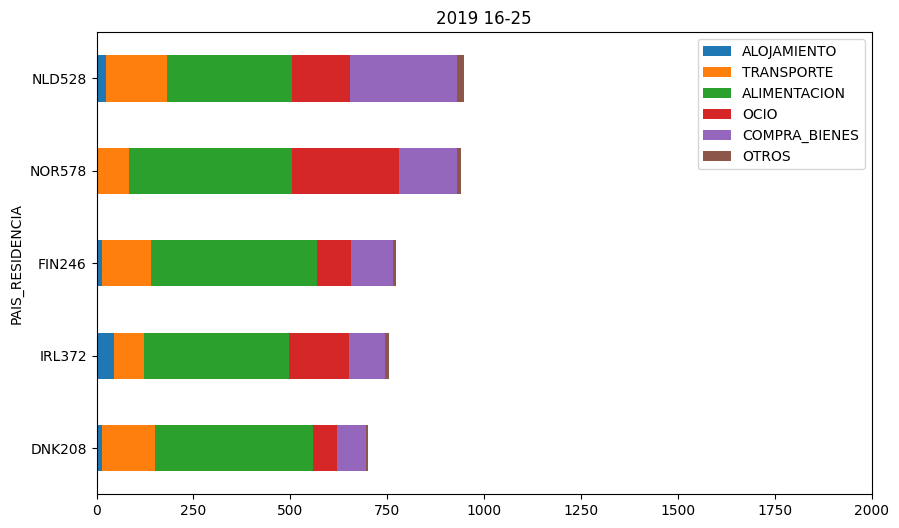

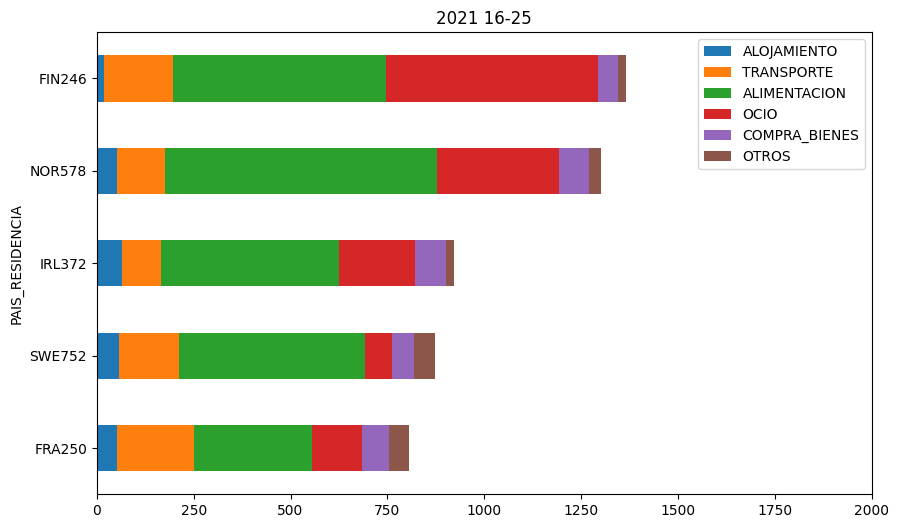

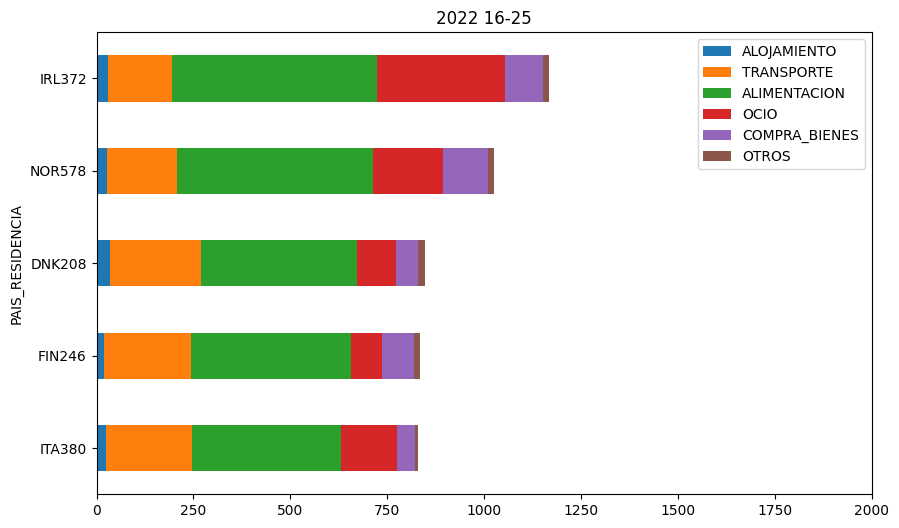

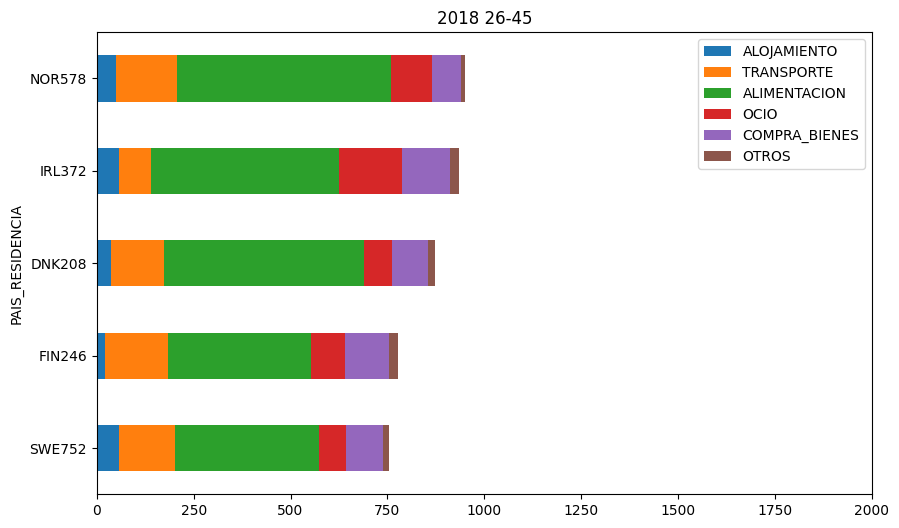

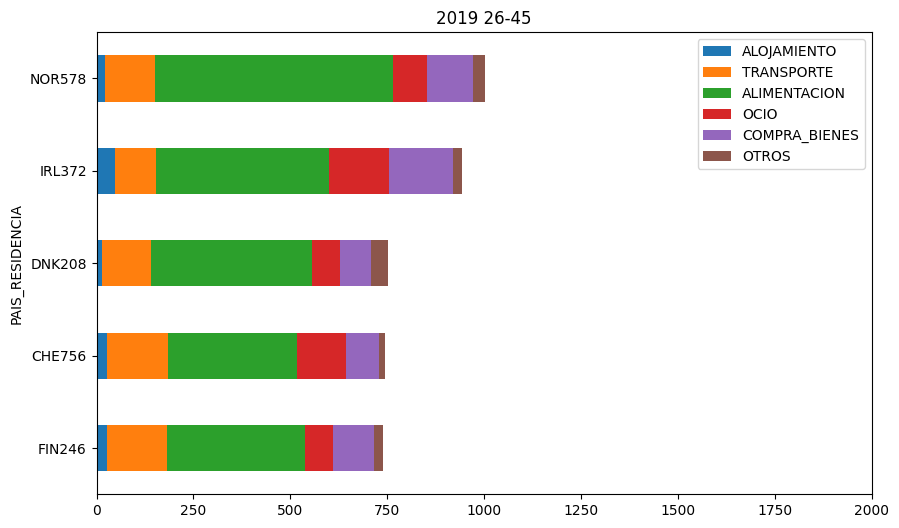

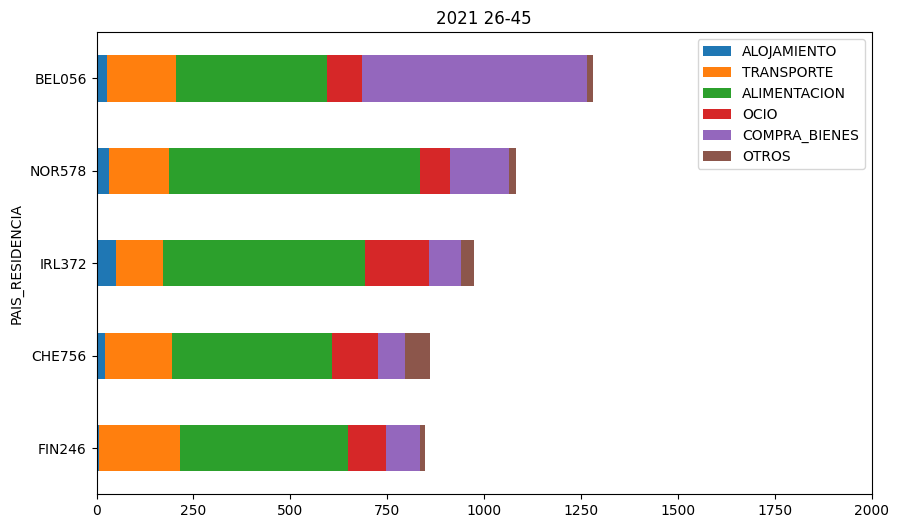

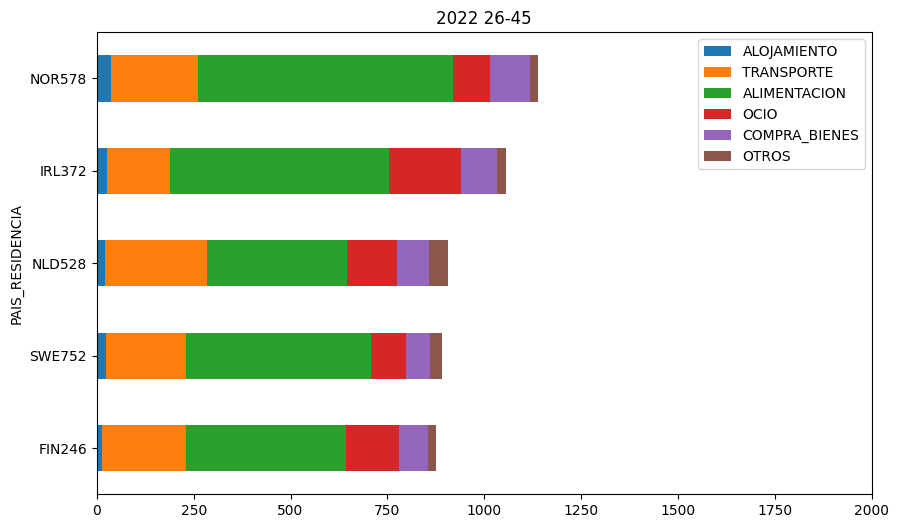

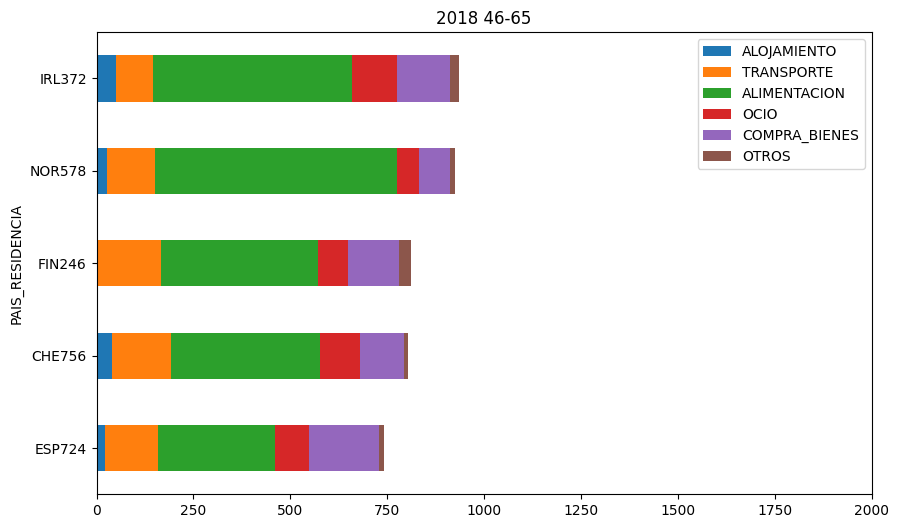

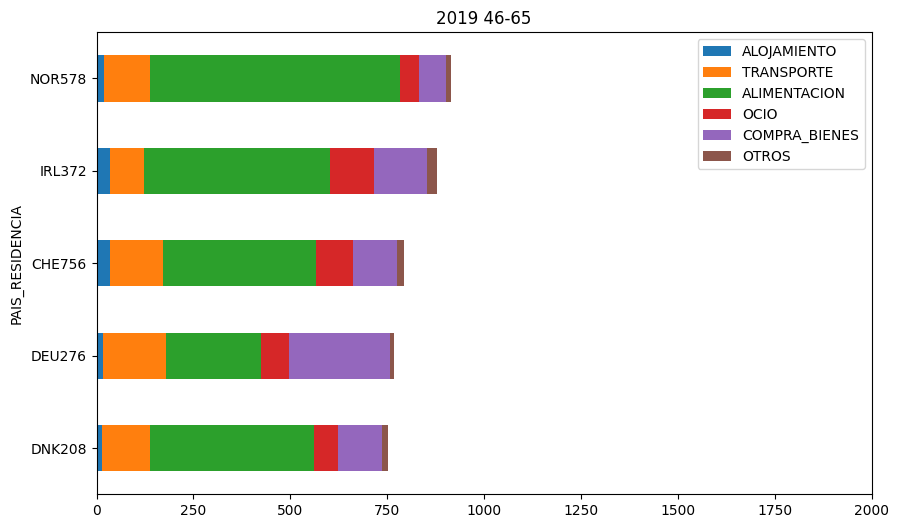

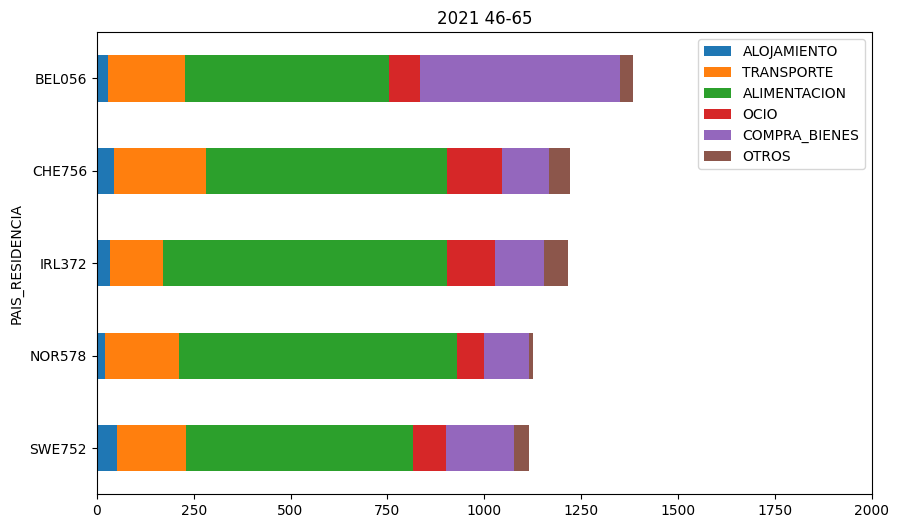

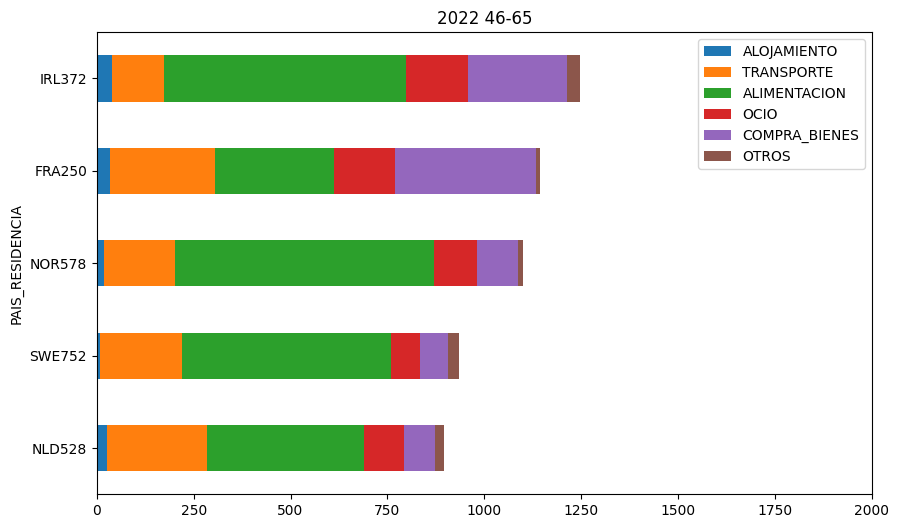

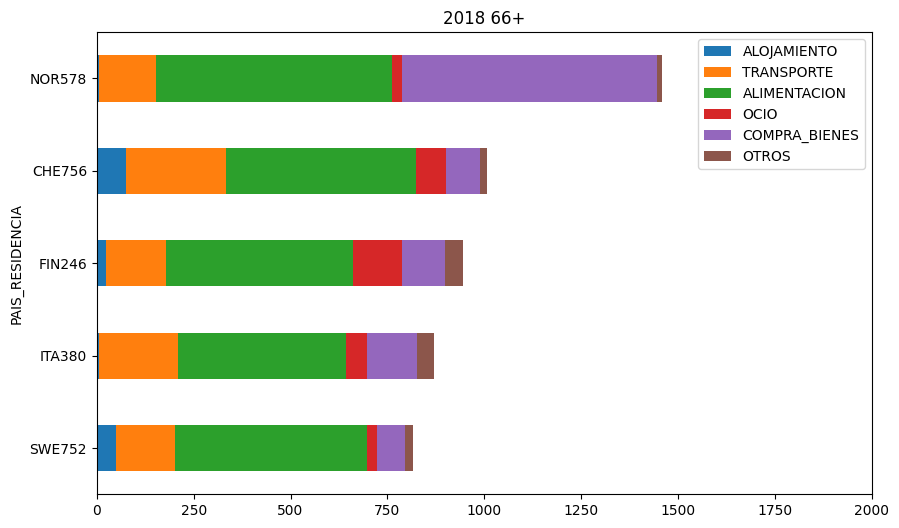

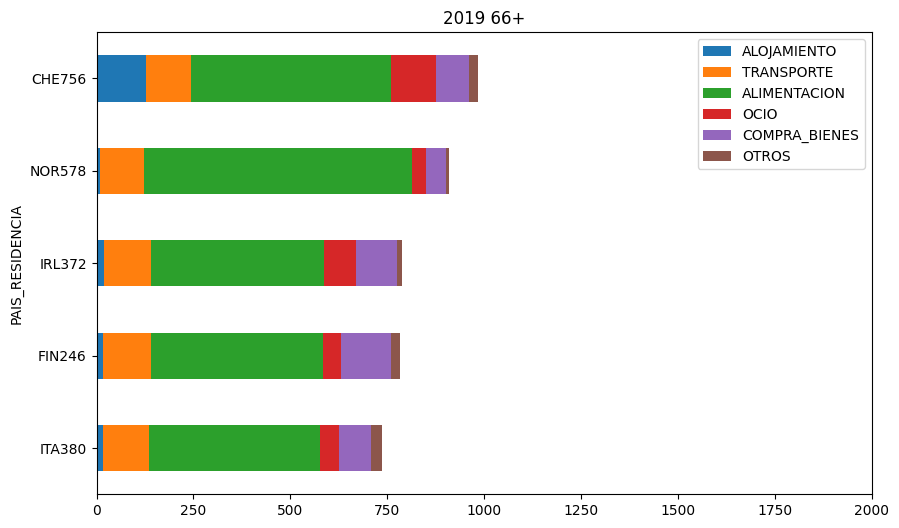

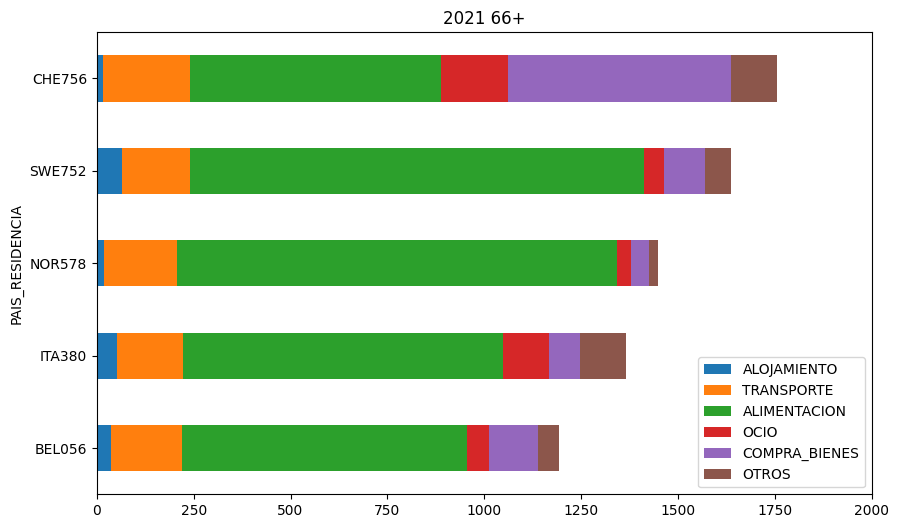

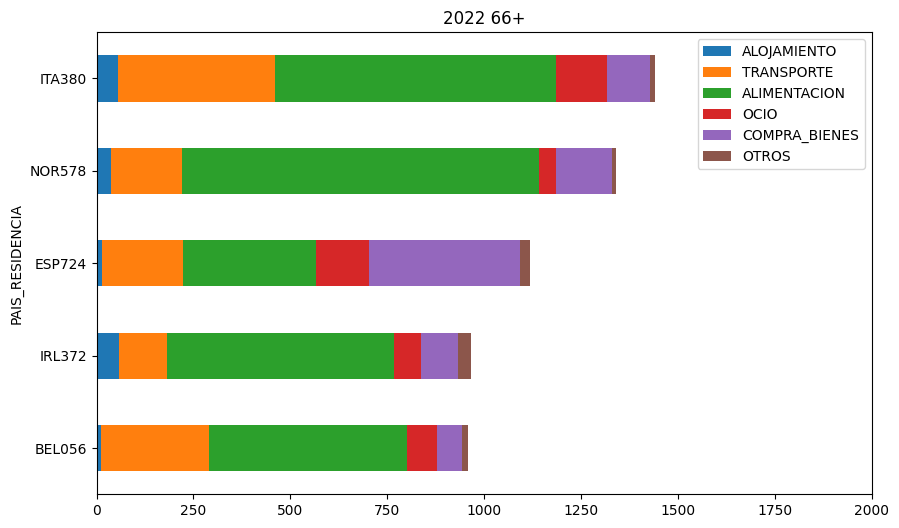

In [15]:
for x in range(len(edades)):
    for y in range(len(anio)):
        main_edades[x][y] = main_edades[x][y].drop('ZZZ900')
        main_edades[x][y] = main_edades[x][y].sort_values(by=['TOTAL']).tail(5).drop(columns=['TOTAL'])
        ax = main_edades[x][y].plot.barh(stacked=True, title=anio[y] + " " + edades[x], figsize=(10, 6))
        ax.set_xlim([0,2000])
   

## Sunburst

In [16]:
allDesglose = ['PAIS_RESIDENCIA', 'EDAD', 'TRIMESTRE', 'GASTO_EUROS','DESGLOSE_EXTRA_ALOJ', 'DESGLOSE_PASAJES_ISLAS', 'DESGLOSE_TAXI',
                      'DESGLOSE_ALQ_VEHIC', 'DESGLOSE_TRANSP_PUBLICO', 'DESGLOSE_ALIM_SUPER',
                      'DESGLOSE_RESTAURANT', 'DESGLOSE_EXCURS_ORGANIZ', 'DESGLOSE_DEPORTES',
                      'DESGLOSE_ACTIV_CULTURAL', 'DESGLOSE_MUSEOS', 'DESGLOSE_PARQUES_OCIO',
                      'DESGLOSE_DISCOTECAS', 'DESGLOSE_SALUD', 'DESGLOSE_SOUVENIRS',
                      'DESGLOSE_BIENES_INMUEBLES', 'DESGLOSE_OTRAS_COMPRAS',
                      'DESGLOSE_FARMACIA', 'DESGLOSE_OTROS_GASTOS']

copy_df_total = df_total.copy()

copy_df_total = copy_df_total[allDesglose].replace(',', '.', regex=True)

copy_df_total['ALOJAMIENTO'] = copy_df_total.DESGLOSE_EXTRA_ALOJ.astype(float) * copy_df_total.GASTO_EUROS.astype(float) / 100
copy_df_total['TRANSPORTE'] = (copy_df_total.DESGLOSE_PASAJES_ISLAS.astype(float) + copy_df_total.DESGLOSE_TAXI.astype(float) + 
                                    copy_df_total.DESGLOSE_TRANSP_PUBLICO.astype(float) + copy_df_total.DESGLOSE_ALQ_VEHIC.astype(float)) * copy_df_total.GASTO_EUROS.astype(float) / 100
copy_df_total['ALIMENTACION'] = (copy_df_total.DESGLOSE_ALIM_SUPER.astype(float) + copy_df_total.DESGLOSE_RESTAURANT.astype(float)) * copy_df_total.GASTO_EUROS.astype(float) / 100
copy_df_total['OCIO'] = (copy_df_total.DESGLOSE_EXCURS_ORGANIZ.astype(float) + copy_df_total.DESGLOSE_DEPORTES.astype(float) + copy_df_total.DESGLOSE_ACTIV_CULTURAL.astype(float) + 
                                copy_df_total.DESGLOSE_MUSEOS.astype(float) + copy_df_total.DESGLOSE_PARQUES_OCIO.astype(float) + copy_df_total.DESGLOSE_DISCOTECAS.astype(float) + 
                                copy_df_total.DESGLOSE_SALUD.astype(float)) * copy_df_total.GASTO_EUROS.astype(float) / 100
copy_df_total['COMPRA_BIENES'] = (copy_df_total.DESGLOSE_SOUVENIRS.astype(float) + copy_df_total.DESGLOSE_BIENES_INMUEBLES.astype(float) + 
                                        copy_df_total.DESGLOSE_OTRAS_COMPRAS.astype(float)) * copy_df_total.GASTO_EUROS.astype(float) / 100
copy_df_total['OTROS'] = (copy_df_total.DESGLOSE_FARMACIA.astype(float) + copy_df_total.DESGLOSE_OTROS_GASTOS.astype(float)) * copy_df_total.GASTO_EUROS.astype(float) / 100
copy_df_total['TOTAL'] =  copy_df_total['ALOJAMIENTO'] + copy_df_total['TRANSPORTE'] + copy_df_total['ALIMENTACION'] + copy_df_total['OCIO'] + copy_df_total['COMPRA_BIENES'] + copy_df_total['OTROS']


In [17]:
copy_df_total['TRIMESTRE'] = copy_df_total['TRIMESTRE'].apply(lambda x: x[:4])
copy_df_total = copy_df_total.drop(copy_df_total[copy_df_total.PAIS_RESIDENCIA == 'ZZZ900'].index)

def group_age(age):
    if age <= 25:
        return '16-25 años'
    elif age <= 45:
        return '26-45 años'
    elif age <= 65:
        return '46-65 años'
    else:
        return '66-99 años'

copy_df_total['GRUPO_EDAD'] = copy_df_total['EDAD'].apply(group_age)
copy_df_total.dropna(subset=['ALOJAMIENTO'], inplace=True)

In [18]:
top_10_paises = copy_df_total.groupby('PAIS_RESIDENCIA')['TOTAL'].sum().sort_values(ascending=False).head(3).index.tolist()
mask = copy_df_total['PAIS_RESIDENCIA'].isin(top_10_paises)
nuevo_df = copy_df_total[mask]
nuevo_df

PAIS_RESIDENCIA  EDAD TRIMESTRE GASTO_EUROS DESGLOSE_EXTRA_ALOJ   
0              DEU276    70      2018         244                   0  \
1              DEU276    34      2018      100.08                   0   
2              GBR826    56      2018    239.3762         47.08070393   
3              GBR826    67      2018    601.6362                   0   
4              GBR826    53      2018      450.66                   0   
...               ...   ...       ...         ...                 ...   
39577          DEU276    60      2022           0                   0   
39580          ESP724    57      2022         810                   0   
39581          GBR826    52      2022      668.36                   0   
39583          ESP724    65      2022      114.94                   0   
39584          ESP724    49      2022      370.02                   0   

      DESGLOSE_PASAJES_ISLAS DESGLOSE_TAXI DESGLOSE_ALQ_VEHIC   
0                          0             0       81.967213115  \
1                          0             0                  0   
2                          0   52.91929607                  0   
3                          0  21.055282245                  0   
4                          0             0                 20   
...                      ...           ...                ...   
39577                      0             0                  0   
39580                      0             0       32.098765432   
39581           8.5805475175  1.3466040464                  0   
39583                      0  13.043478261                  0   
39584                      0  8.1081081081                  0   

      DESGLOSE_TRANSP_PUBLICO DESGLOSE_ALIM_SUPER  ... DESGLOSE_FARMACIA   
0                           0                   0  ...                 0  \
1                           0                   0  ...                10   
2                           0                   0  ...                 0   
3                           0         33.23988116  ...                 0   
4                           0                  60  ...                 0   
...                       ...                 ...  ...               ...   
39577                       0                   0  ...                 0   
39580                       0        18.518518519  ...                 0   
39581            0.2992453436        14.962267182  ...                 0   
39583                       0                   0  ...                 0   
39584                       0                   0  ...                 0   

      DESGLOSE_OTROS_GASTOS ALOJAMIENTO  TRANSPORTE ALIMENTACION        OCIO   
0                         0         0.0  200.000000     0.000000   24.000000  \
1                         0         0.0    0.000000     0.000000    0.000000   
2                         0       112.7  126.676200     0.000000    0.000000   
3                         0         0.0  126.676200   474.960000    0.000000   
4                         0         0.0   90.132000   360.528000    0.000000   
...                     ...         ...         ...          ...         ...   
39577                     0         0.0    0.000000     0.000000    0.000000   
39580                     0         0.0  260.000000   450.000000    0.000000   
39581                     0         0.0   68.349146   300.005427  300.005427   
39583                     0         0.0   14.992174    99.947826    0.000000   
39584                     0         0.0   30.001622   250.013514    0.000000   

      COMPRA_BIENES   OTROS     TOTAL  GRUPO_EDAD  
0         20.000000   0.000  244.0000  66-99 años  
1         90.072000  10.008  100.0800  26-45 años  
2          0.000000   0.000  239.3762  46-65 años  
3          0.000000   0.000  601.6362  66-99 años  
4          0.000000   0.000  450.6600  46-65 años  
...             ...     ...       ...         ...  
39577      0.000000   0.000    0.0000  46-65 años  
39580    100.000000   0.000  810.0000  46-65 años  
39581 

In [19]:
nuevo_df[['TRIMESTRE', 'GRUPO_EDAD','PAIS_RESIDENCIA' , 'TOTAL', 'ALOJAMIENTO', 'TRANSPORTE', 'OCIO', 'COMPRA_BIENES', 'OTROS', 'ALIMENTACION']]

TRIMESTRE  GRUPO_EDAD PAIS_RESIDENCIA     TOTAL  ALOJAMIENTO   
0          2018  66-99 años          DEU276  244.0000          0.0  \
1          2018  26-45 años          DEU276  100.0800          0.0   
2          2018  46-65 años          GBR826  239.3762        112.7   
3          2018  66-99 años          GBR826  601.6362          0.0   
4          2018  46-65 años          GBR826  450.6600          0.0   
...         ...         ...             ...       ...          ...   
39577      2022  46-65 años          DEU276    0.0000          0.0   
39580      2022  46-65 años          ESP724  810.0000          0.0   
39581      2022  46-65 años          GBR826  668.3600          0.0   
39583      2022  46-65 años          ESP724  114.9400          0.0   
39584      2022  46-65 años          ESP724  370.0200          0.0   

       TRANSPORTE        OCIO  COMPRA_BIENES   OTROS  ALIMENTACION  
0      200.000000   24.000000      20.000000   0.000      0.000000  
1        0.000000    0.000000      90.072000  10.008      0.000000  
2      126.676200    0.000000       0.000000   0.000      0.000000  
3      126.676200    0.000000       0.000000   0.000    474.960000  
4       90.132000    0.000000       0.000000   0.000    360.528000  
...           ...         ...            ...     ...           ...  
39577    0.000000    0.000000       0.000000   0.000      0.000000  
39580  260.000000    0.000000     100.000000   0.000    450.000000  
39581   68.349146  300.005427       0.000000   0.000    300.005427  
39583   14.992174    0.000000       0.000000   0.000     99.947826  
39584   30.001622    0.000000      90.004865   0.000    250.013514  

[72995 rows x 10 columns]

In [20]:
df_melted = pd.melt(nuevo_df, id_vars=['TRIMESTRE', 'GRUPO_EDAD', 'PAIS_RESIDENCIA'], value_vars=['ALOJAMIENTO', 'TRANSPORTE', 'OCIO', 'COMPRA_BIENES', 'OTROS', 'ALIMENTACION'], var_name='TIPO', value_name='GASTO')
df_melted

TRIMESTRE  GRUPO_EDAD PAIS_RESIDENCIA          TIPO       GASTO
0           2018  66-99 años          DEU276   ALOJAMIENTO    0.000000
1           2018  26-45 años          DEU276   ALOJAMIENTO    0.000000
2           2018  46-65 años          GBR826   ALOJAMIENTO  112.700000
3           2018  66-99 años          GBR826   ALOJAMIENTO    0.000000
4           2018  46-65 años          GBR826   ALOJAMIENTO    0.000000
...          ...         ...             ...           ...         ...
437965      2022  46-65 años          DEU276  ALIMENTACION    0.000000
437966      2022  46-65 años          ESP724  ALIMENTACION  450.000000
437967      2022  46-65 años          GBR826  ALIMENTACION  300.005427
437968      2022  46-65 años          ESP724  ALIMENTACION   99.947826
437969      2022  46-65 años          ESP724  ALIMENTACION  250.013514

[437970 rows x 5 columns]

In [21]:
fig = px.sunburst(df_melted, 
                  path=['TRIMESTRE', 'GRUPO_EDAD', 'PAIS_RESIDENCIA', 'TIPO'], 
                  values='GASTO',
                  title='Gasto en alojamiento por año, grupo de edad, país de residencia y tipo de alojamiento',
                  color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_layout(
    width=1500,  # Ancho de la figura en píxeles
    height=1800  # Altura de la figura en píxeles
)
fig.show()

In [22]:
# Alojamiento
nuevo_df_desgloseAlojamiento = nuevo_df[['TRIMESTRE', 'GRUPO_EDAD', 'PAIS_RESIDENCIA', 'DESGLOSE_EXTRA_ALOJ']].copy()
nuevo_df_desgloseAlojamiento = nuevo_df_desgloseAlojamiento.assign(TIPO='ALOJAMIENTO')

nuevo_df_desgloseAlojamiento_melted = pd.melt(nuevo_df_desgloseAlojamiento, id_vars=['TRIMESTRE', 'GRUPO_EDAD', 'PAIS_RESIDENCIA', 'TIPO'], value_vars=['DESGLOSE_EXTRA_ALOJ'], var_name='SUBTIPO', value_name='GASTO')

# Transporte
nuevo_df_desgloseTransporte = nuevo_df[['TRIMESTRE', 'GRUPO_EDAD', 'PAIS_RESIDENCIA', 'DESGLOSE_PASAJES_ISLAS', 'DESGLOSE_TAXI', 'DESGLOSE_TRANSP_PUBLICO', 'DESGLOSE_ALQ_VEHIC']].copy()
nuevo_df_desgloseTransporte = nuevo_df_desgloseTransporte.assign(TIPO='TRANSPORTE')

nuevo_df_desgloseTransporte_melted = pd.melt(nuevo_df_desgloseTransporte, id_vars=['TRIMESTRE', 'GRUPO_EDAD', 'PAIS_RESIDENCIA', 'TIPO'], value_vars=['DESGLOSE_PASAJES_ISLAS', 'DESGLOSE_TAXI', 'DESGLOSE_TRANSP_PUBLICO', 'DESGLOSE_ALQ_VEHIC'], var_name='SUBTIPO', value_name='GASTO')

# Alimentacion
nuevo_df_desgloseAlimentacion = nuevo_df[['TRIMESTRE', 'GRUPO_EDAD', 'PAIS_RESIDENCIA', 'DESGLOSE_ALIM_SUPER', 'DESGLOSE_RESTAURANT']].copy()
nuevo_df_desgloseAlimentacion = nuevo_df_desgloseAlimentacion.assign(TIPO='ALIMENTACION')

nuevo_df_desgloseAlimentacion_melted = pd.melt(nuevo_df_desgloseAlimentacion, id_vars=['TRIMESTRE', 'GRUPO_EDAD', 'PAIS_RESIDENCIA', 'TIPO'], value_vars=['DESGLOSE_ALIM_SUPER', 'DESGLOSE_RESTAURANT'], var_name='SUBTIPO', value_name='GASTO')

# Ocio
nuevo_df_desgloseOcio = nuevo_df[['TRIMESTRE', 'GRUPO_EDAD', 'PAIS_RESIDENCIA', 'DESGLOSE_EXCURS_ORGANIZ', 'DESGLOSE_DEPORTES', 'DESGLOSE_ACTIV_CULTURAL', 'DESGLOSE_MUSEOS', 'DESGLOSE_PARQUES_OCIO', 'DESGLOSE_DISCOTECAS', 'DESGLOSE_SALUD']].copy()
nuevo_df_desgloseOcio = nuevo_df_desgloseOcio.assign(TIPO='OCIO')

nuevo_df_desgloseOcio_melted = pd.melt(nuevo_df_desgloseOcio, id_vars=['TRIMESTRE', 'GRUPO_EDAD', 'PAIS_RESIDENCIA', 'TIPO'], value_vars=['DESGLOSE_EXCURS_ORGANIZ', 'DESGLOSE_DEPORTES', 'DESGLOSE_ACTIV_CULTURAL', 'DESGLOSE_MUSEOS', 'DESGLOSE_PARQUES_OCIO', 'DESGLOSE_DISCOTECAS', 'DESGLOSE_SALUD'], var_name='SUBTIPO', value_name='GASTO')

# Compra bienes
nuevo_df_desgloseCompraBienes = nuevo_df[['TRIMESTRE', 'GRUPO_EDAD', 'PAIS_RESIDENCIA', 'DESGLOSE_SOUVENIRS', 'DESGLOSE_BIENES_INMUEBLES', 'DESGLOSE_OTRAS_COMPRAS']].copy()
nuevo_df_desgloseCompraBienes = nuevo_df_desgloseCompraBienes.assign(TIPO='COMPRA_BIENES')

nuevo_df_desgloseCompraBienes_melted = pd.melt(nuevo_df_desgloseCompraBienes, id_vars=['TRIMESTRE', 'GRUPO_EDAD', 'PAIS_RESIDENCIA', 'TIPO'], value_vars=['DESGLOSE_SOUVENIRS', 'DESGLOSE_BIENES_INMUEBLES', 'DESGLOSE_OTRAS_COMPRAS'], var_name='SUBTIPO', value_name='GASTO')

# Otros
nuevo_df_desgloseOtros = nuevo_df[['TRIMESTRE', 'GRUPO_EDAD', 'PAIS_RESIDENCIA', 'DESGLOSE_FARMACIA', 'DESGLOSE_OTROS_GASTOS']].copy()
nuevo_df_desgloseOtros = nuevo_df_desgloseOtros.assign(TIPO='OTROS')

nuevo_df_desgloseOtros_melted = pd.melt(nuevo_df_desgloseOtros, id_vars=['TRIMESTRE', 'GRUPO_EDAD', 'PAIS_RESIDENCIA', 'TIPO'], value_vars=['DESGLOSE_FARMACIA', 'DESGLOSE_OTROS_GASTOS'], var_name='SUBTIPO', value_name='GASTO')


In [23]:
df_allMelted = pd.concat([nuevo_df_desgloseAlojamiento_melted, nuevo_df_desgloseTransporte_melted, nuevo_df_desgloseAlimentacion_melted, nuevo_df_desgloseOcio_melted, nuevo_df_desgloseCompraBienes_melted, nuevo_df_desgloseOtros_melted])
df_allMelted

TRIMESTRE  GRUPO_EDAD PAIS_RESIDENCIA         TIPO   
0           2018  66-99 años          DEU276  ALOJAMIENTO  \
1           2018  26-45 años          DEU276  ALOJAMIENTO   
2           2018  46-65 años          GBR826  ALOJAMIENTO   
3           2018  66-99 años          GBR826  ALOJAMIENTO   
4           2018  46-65 años          GBR826  ALOJAMIENTO   
...          ...         ...             ...          ...   
145985      2022  46-65 años          DEU276        OTROS   
145986      2022  46-65 años          ESP724        OTROS   
145987      2022  46-65 años          GBR826        OTROS   
145988      2022  46-65 años          ESP724        OTROS   
145989      2022  46-65 años          ESP724        OTROS   

                      SUBTIPO        GASTO  
0         DESGLOSE_EXTRA_ALOJ            0  
1         DESGLOSE_EXTRA_ALOJ            0  
2         DESGLOSE_EXTRA_ALOJ  47.08070393  
3         DESGLOSE_EXTRA_ALOJ            0  
4         DESGLOSE_EXTRA_ALOJ            0  
...                       ...          ...  
145985  DESGLOSE_OTROS_GASTOS            0  
145986  DESGLOSE_OTROS_GASTOS            0  
145987  DESGLOSE_OTROS_GASTOS            0  
145988  DESGLOSE_OTROS_GASTOS            0  
145989  DESGLOSE_OTROS_GASTOS            0  

[1386905 rows x 6 columns]

In [24]:
fig = px.sunburst(df_allMelted, 
                  path=['TRIMESTRE', 'GRUPO_EDAD', 'PAIS_RESIDENCIA', 'TIPO', 'SUBTIPO'], 
                  values='GASTO',
                  title='Gasto en alojamiento por año, grupo de edad, país de residencia y tipo de alojamiento',
                  color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_layout(
    width=1500,  # Ancho de la figura en píxeles
    height=1800  # Altura de la figura en píxeles
)
fig.show()

# Sankey Diagram del gasto de los turistas

In [25]:
df_sankey = nuevo_df.copy()
df1 = df_sankey.groupby(['GRUPO_EDAD','PAIS_RESIDENCIA']).size().reset_index(name="value")
df1.columns = ['source','target','value']

# Alojamiento
df2_aloja = df_sankey.groupby(['PAIS_RESIDENCIA'])['ALOJAMIENTO'].sum().reset_index()
df2_aloja['TIPO'] = 'ALOJAMIENTO'
df2_aloja = df2_aloja.reindex(columns=['PAIS_RESIDENCIA', 'TIPO', 'ALOJAMIENTO'])
df2_aloja.columns = ['source','target','value']

# Transporte
df2_trans = df_sankey.groupby(['PAIS_RESIDENCIA'])['TRANSPORTE'].sum().reset_index()
df2_trans['TIPO'] = 'TRANSPORTE'
df2_trans = df2_trans.reindex(columns=['PAIS_RESIDENCIA', 'TIPO', 'TRANSPORTE'])
df2_trans.columns = ['source','target','value']

# ALIMENTACION
df2_ali = df_sankey.groupby(['PAIS_RESIDENCIA'])['ALIMENTACION'].sum().reset_index()
df2_ali['TIPO'] = 'ALIMENTACION'
df2_ali = df2_ali.reindex(columns=['PAIS_RESIDENCIA', 'TIPO', 'ALIMENTACION'])
df2_ali.columns = ['source','target','value']

# OCIO
df2_ocio = df_sankey.groupby(['PAIS_RESIDENCIA'])['OCIO'].sum().reset_index()
df2_ocio['TIPO'] = 'OCIO'
df2_ocio = df2_ocio.reindex(columns=['PAIS_RESIDENCIA', 'TIPO', 'OCIO'])
df2_ocio.columns = ['source','target','value']

# COMPRA_BIENES
df2_compra_bienes = df_sankey.groupby(['PAIS_RESIDENCIA'])['COMPRA_BIENES'].sum().reset_index()
df2_compra_bienes['TIPO'] = 'COMPRA_BIENES'
df2_compra_bienes = df2_compra_bienes.reindex(columns=['PAIS_RESIDENCIA', 'TIPO', 'COMPRA_BIENES'])
df2_compra_bienes.columns = ['source','target','value']

# OTROS
df2_otros = df_sankey.groupby(['PAIS_RESIDENCIA'])['OTROS'].sum().reset_index()
df2_otros['TIPO'] = 'OTROS'
df2_otros = df2_otros.reindex(columns=['PAIS_RESIDENCIA', 'TIPO', 'OTROS'])
df2_otros.columns = ['source','target','value']

df2 = pd.concat([df1, df2_aloja, df2_trans, df2_ali, df2_ocio, df2_compra_bienes, df2_otros], axis=0)
df2['value']

0     2.328000e+03
1     3.593000e+03
2     2.895000e+03
3     7.252000e+03
4     1.369200e+04
5     9.892000e+03
6     8.260000e+03
7     7.513000e+03
8     1.167800e+04
9     1.992000e+03
10    8.350000e+02
11    3.065000e+03
0     3.493474e+05
1     5.511917e+05
2     8.219993e+05
0     4.082572e+06
1     3.720461e+06
2     3.301838e+06
0     5.631973e+06
1     6.822975e+06
2     1.025933e+07
0     1.840649e+06
1     2.082506e+06
2     2.770105e+06
0     2.165702e+06
1     2.168936e+06
2     2.341968e+06
0     3.672552e+05
1     3.624668e+05
2     5.144345e+05
Name: value, dtype: float64

In [26]:
unique_source_target = list(pd.unique(df2[['source','target']].values.ravel('k')))
mapping_dict = {k: v for v, k in enumerate(unique_source_target)}
links_dict = df2.to_dict(orient='list')
df2['source'] = df2['source'].map(mapping_dict)
df2['target'] = df2['target'].map(mapping_dict)
links_dict = df2.to_dict(orient='list')
df2

source  target         value
0        0       4  2.328000e+03
1        0       5  3.593000e+03
2        0       6  2.895000e+03
3        1       4  7.252000e+03
4        1       5  1.369200e+04
5        1       6  9.892000e+03
6        2       4  8.260000e+03
7        2       5  7.513000e+03
8        2       6  1.167800e+04
9        3       4  1.992000e+03
10       3       5  8.350000e+02
11       3       6  3.065000e+03
0        4       7  3.493474e+05
1        5       7  5.511917e+05
2        6       7  8.219993e+05
0        4       8  4.082572e+06
1        5       8  3.720461e+06
2        6       8  3.301838e+06
0        4       9  5.631973e+06
1        5       9  6.822975e+06
2        6       9  1.025933e+07
0        4      10  1.840649e+06
1        5      10  2.082506e+06
2        6      10  2.770105e+06
0        4      11  2.165702e+06
1        5      11  2.168936e+06
2        6      11  2.341968e+06
0        4      12  3.672552e+05
1        5      12  3.624668e+05
2        6      12  5.144345e+05

In [27]:
# Crea un objeto Sankey
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label = unique_source_target,
        color='green'
    ),
    link = dict(
        source= links_dict['source'],
        target = links_dict['target'],
        value = links_dict['value']
    )
)
])

# Personaliza el diseño del gráfico
fig.update_layout(title_text='Diagrama de Sankey',
                  font=dict(size=12, color='black'),
                  plot_bgcolor='white')

# Muestra el gráfico
fig.show()
print(unique_source_target)


['16-25 años', '26-45 años', '46-65 años', '66-99 años', 'DEU276', 'ESP724', 'GBR826', 'ALOJAMIENTO', 'TRANSPORTE', 'ALIMENTACION', 'OCIO', 'COMPRA_BIENES', 'OTROS']


In [28]:
df_sankey = df_sankey.drop('TRIMESTRE', axis=1)
links_dict

{'source': [0,
  0,
  0,
  1,
  1,
  1,
  2,
  2,
  2,
  3,
  3,
  3,
  4,
  5,
  6,
  4,
  5,
  6,
  4,
  5,
  6,
  4,
  5,
  6,
  4,
  5,
  6,
  4,
  5,
  6],
 'target': [4,
  5,
  6,
  4,
  5,
  6,
  4,
  5,
  6,
  4,
  5,
  6,
  7,
  7,
  7,
  8,
  8,
  8,
  9,
  9,
  9,
  10,
  10,
  10,
  11,
  11,
  11,
  12,
  12,
  12],
 'value': [2328.0,
  3593.0,
  2895.0,
  7252.0,
  13692.0,
  9892.0,
  8260.0,
  7513.0,
  11678.0,
  1992.0,
  835.0,
  3065.0,
  349347.4332238525,
  551191.6590049829,
  821999.3483274695,
  4082572.3030003114,
  3720461.0256991736,
  3301837.630925815,
  5631972.584127223,
  6822974.9755647415,
  10259331.191432655,
  1840648.6511716563,
  2082506.282763692,
  2770104.5532804173,
  2165702.28272429,
  2168936.346144367,
  2341968.3701978438,
  367255.1761485929,
  362466.83486510423,
  514434.5204683239]}

In [29]:
# 
fig = px.parallel_categories(df_sankey)
fig.show()

### Tipo - Desglose

In [30]:
df_sankey_Tipo_Desglose = df_allMelted[['TIPO', 'SUBTIPO', 'GASTO']].copy()
df_sankey_Tipo_Desglose['GASTO'] = pd.to_numeric(df_sankey_Tipo_Desglose['GASTO'], errors='coerce')
df_sankey_Tipo_Desglose = df_sankey_Tipo_Desglose.drop(df_sankey_Tipo_Desglose[df_sankey_Tipo_Desglose['GASTO'] == 0].index).reset_index(drop=True)

In [31]:
# Crear un diccionario para mapear los índices únicos de TIPO y SUBTIPO
# a números enteros para su uso en el gráfico Sankey
tipos = df_sankey_Tipo_Desglose['TIPO'].unique()
subtipos = df_sankey_Tipo_Desglose['SUBTIPO'].unique()
indices_tipos = {tipo: idx for idx, tipo in enumerate(tipos)}
indices_subtipos = {subtipo: idx + len(tipos) for idx, subtipo in enumerate(subtipos)}
indices_totales = {**indices_tipos, **indices_subtipos}

# Crear las listas de nodos y conexiones para el gráfico Sankey
nodos = tipos.tolist() + subtipos.tolist()
conexiones = []
for _, row in df_sankey_Tipo_Desglose.iterrows():
    conexion = (
        indices_totales[row['TIPO']],  # Índice del nodo de origen
        indices_totales[row['SUBTIPO']],  # Índice del nodo de destino
        row['GASTO']  # Valor de la conexión entre los nodos
    )
    conexiones.append(conexion)

# Crear el objeto Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        label=nodos,
        pad=15,
        thickness=20,
    ),
    link=dict(
        source=[c[0] for c in conexiones],
        target=[c[1] for c in conexiones],
        value=[c[2] for c in conexiones],
    )
)])

# Mostrar el gráfico Sankey
fig.show()




In [32]:
unique_source_target = list(pd.unique(df_sankey_Tipo_Desglose[['source','target']].values.ravel('k')))
mapping_dict = {k: v for v, k in enumerate(unique_source_target)}
links_dict = df_sankey_Tipo_Desglose.to_dict(orient='list')
df_sankey_Tipo_Desglose['source'] = df_sankey_Tipo_Desglose['source'].map(mapping_dict)
df_sankey_Tipo_Desglose['target'] = df_sankey_Tipo_Desglose['target'].map(mapping_dict)
links_dict = df_sankey_Tipo_Desglose.to_dict(orient='list')
links_dict


KeyError: "None of [Index(['source', 'target'], dtype='object')] are in the [columns]"

In [ ]:
# Crea un objeto Sankey
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label = unique_source_target,
        color='green'
    ),
    link = dict(
        source= links_dict['source'],
        target = links_dict['target'],
        value = links_dict['value']
    )
)
])

# Personaliza el diseño del gráfico
fig.update_layout(title_text='Diagrama de Sankey',
                  font=dict(size=12, color='black'),
                  plot_bgcolor='white')

# Muestra el gráfico
fig.show()
print(unique_source_target)

['ALOJAMIENTO', 'TRANSPORTE', 'ALIMENTACION', 'OCIO', 'COMPRA_BIENES', 'OTROS', 'DESGLOSE_EXTRA_ALOJ', 'DESGLOSE_PASAJES_ISLAS', 'DESGLOSE_TAXI', 'DESGLOSE_TRANSP_PUBLICO', 'DESGLOSE_ALQ_VEHIC', 'DESGLOSE_ALIM_SUPER', 'DESGLOSE_RESTAURANT', 'DESGLOSE_EXCURS_ORGANIZ', 'DESGLOSE_DEPORTES', 'DESGLOSE_ACTIV_CULTURAL', 'DESGLOSE_MUSEOS', 'DESGLOSE_PARQUES_OCIO', 'DESGLOSE_DISCOTECAS', 'DESGLOSE_SALUD', 'DESGLOSE_SOUVENIRS', 'DESGLOSE_BIENES_INMUEBLES', 'DESGLOSE_OTRAS_COMPRAS', 'DESGLOSE_FARMACIA', 'DESGLOSE_OTROS_GASTOS']


### Grupo Edad - Desglose

In [ ]:
df_sankey_EDAD_DESGLOSE = nuevo_df.copy()
df_sankey_EDAD_DESGLOSE['DESGLOSE_EXTRA_ALOJ'] = df_sankey_EDAD_DESGLOSE['DESGLOSE_EXTRA_ALOJ'].astype(float)
df_sankey_EDAD_DESGLOSE['DESGLOSE_PASAJES_ISLAS'] = df_sankey_EDAD_DESGLOSE['DESGLOSE_PASAJES_ISLAS'].astype(float)
df_sankey_EDAD_DESGLOSE['DESGLOSE_TAXI'] = df_sankey_EDAD_DESGLOSE['DESGLOSE_TAXI'].astype(float)
df_sankey_EDAD_DESGLOSE['DESGLOSE_TRANSP_PUBLICO'] = df_sankey_EDAD_DESGLOSE['DESGLOSE_TRANSP_PUBLICO'].astype(float)
df_sankey_EDAD_DESGLOSE['DESGLOSE_ALQ_VEHIC'] = df_sankey_EDAD_DESGLOSE['DESGLOSE_ALQ_VEHIC'].astype(float)
df_sankey_EDAD_DESGLOSE['DESGLOSE_ALIM_SUPER'] = df_sankey_EDAD_DESGLOSE['DESGLOSE_ALIM_SUPER'].astype(float)
df_sankey_EDAD_DESGLOSE['DESGLOSE_RESTAURANT'] = df_sankey_EDAD_DESGLOSE['DESGLOSE_RESTAURANT'].astype(float)
df_sankey_EDAD_DESGLOSE['DESGLOSE_EXCURS_ORGANIZ'] = df_sankey_EDAD_DESGLOSE['DESGLOSE_EXCURS_ORGANIZ'].astype(float)
df_sankey_EDAD_DESGLOSE['DESGLOSE_DEPORTES'] = df_sankey_EDAD_DESGLOSE['DESGLOSE_DEPORTES'].astype(float)
df_sankey_EDAD_DESGLOSE['DESGLOSE_ACTIV_CULTURAL'] = df_sankey_EDAD_DESGLOSE['DESGLOSE_ACTIV_CULTURAL'].astype(float)
df_sankey_EDAD_DESGLOSE['DESGLOSE_MUSEOS'] = df_sankey_EDAD_DESGLOSE['DESGLOSE_MUSEOS'].astype(float)
df_sankey_EDAD_DESGLOSE['DESGLOSE_PARQUES_OCIO'] = df_sankey_EDAD_DESGLOSE['DESGLOSE_PARQUES_OCIO'].astype(float)
df_sankey_EDAD_DESGLOSE['DESGLOSE_DISCOTECAS'] = df_sankey_EDAD_DESGLOSE['DESGLOSE_DISCOTECAS'].astype(float)
df_sankey_EDAD_DESGLOSE['DESGLOSE_SALUD'] = df_sankey_EDAD_DESGLOSE['DESGLOSE_SALUD'].astype(float)
df_sankey_EDAD_DESGLOSE['DESGLOSE_SOUVENIRS'] = df_sankey_EDAD_DESGLOSE['DESGLOSE_SOUVENIRS'].astype(float)
df_sankey_EDAD_DESGLOSE['DESGLOSE_BIENES_INMUEBLES'] = df_sankey_EDAD_DESGLOSE['DESGLOSE_BIENES_INMUEBLES'].astype(float)
df_sankey_EDAD_DESGLOSE['DESGLOSE_OTRAS_COMPRAS'] = df_sankey_EDAD_DESGLOSE['DESGLOSE_OTRAS_COMPRAS'].astype(float)
df_sankey_EDAD_DESGLOSE['DESGLOSE_FARMACIA'] = df_sankey_EDAD_DESGLOSE['DESGLOSE_FARMACIA'].astype(float)
df_sankey_EDAD_DESGLOSE['DESGLOSE_OTROS_GASTOS'] = df_sankey_EDAD_DESGLOSE['DESGLOSE_OTROS_GASTOS'].astype(float)

# Alojamiento

df3_aloja = df_sankey_EDAD_DESGLOSE.groupby(['GRUPO_EDAD'])['DESGLOSE_EXTRA_ALOJ'].sum().reset_index()
df3_aloja['SUBTIPO'] = 'DESGLOSE_EXTRA_ALOJ'
df3_aloja = df3_aloja.reindex(columns=['GRUPO_EDAD', 'SUBTIPO', 'DESGLOSE_EXTRA_ALOJ'])
df3_aloja.columns = ['source','target','value']

# Transporte
df3_trans1 = df_sankey_EDAD_DESGLOSE.groupby(['GRUPO_EDAD'])['DESGLOSE_PASAJES_ISLAS'].sum().reset_index()
df3_trans1['SUBTIPO'] = 'DESGLOSE_PASAJES_ISLAS'
df3_trans1 = df3_trans1.reindex(columns=['GRUPO_EDAD', 'SUBTIPO', 'DESGLOSE_PASAJES_ISLAS'])
df3_trans1.columns = ['source','target','value']

df3_trans2 = df_sankey_EDAD_DESGLOSE.groupby(['GRUPO_EDAD'])['DESGLOSE_TAXI'].sum().reset_index()
df3_trans2['SUBTIPO'] = 'DESGLOSE_TAXI'
df3_trans2 = df3_trans2.reindex(columns=['GRUPO_EDAD', 'SUBTIPO', 'DESGLOSE_TAXI'])
df3_trans2.columns = ['source','target','value']

df3_trans3 = df_sankey_EDAD_DESGLOSE.groupby(['GRUPO_EDAD'])['DESGLOSE_TRANSP_PUBLICO'].sum().reset_index()
df3_trans3['SUBTIPO'] = 'DESGLOSE_TRANSP_PUBLICO'
df3_trans3 = df3_trans3.reindex(columns=['GRUPO_EDAD', 'SUBTIPO', 'DESGLOSE_TRANSP_PUBLICO'])
df3_trans3.columns = ['source','target','value']

df3_trans4 = df_sankey_EDAD_DESGLOSE.groupby(['GRUPO_EDAD'])['DESGLOSE_ALQ_VEHIC'].sum().reset_index()
df3_trans4['SUBTIPO'] = 'DESGLOSE_ALQ_VEHIC'
df3_trans4 = df3_trans4.reindex(columns=['GRUPO_EDAD', 'SUBTIPO', 'DESGLOSE_ALQ_VEHIC'])
df3_trans4.columns = ['source','target','value']

# ALIMENTACION
df3_ali1 = df_sankey_EDAD_DESGLOSE.groupby(['GRUPO_EDAD'])['DESGLOSE_ALIM_SUPER'].sum().reset_index()
df3_ali1['SUBTIPO'] = 'DESGLOSE_ALIM_SUPER'
df3_ali1 = df3_ali1.reindex(columns=['GRUPO_EDAD', 'SUBTIPO', 'DESGLOSE_ALIM_SUPER'])
df3_ali1.columns = ['source','target','value']

df3_ali2 = df_sankey_EDAD_DESGLOSE.groupby(['GRUPO_EDAD'])['DESGLOSE_RESTAURANT'].sum().reset_index()
df3_ali2['SUBTIPO'] = 'DESGLOSE_RESTAURANT'
df3_ali2 = df3_ali2.reindex(columns=['GRUPO_EDAD', 'SUBTIPO', 'DESGLOSE_RESTAURANT'])
df3_ali2.columns = ['source','target','value']

# OCIO
df3_ocio1 = df_sankey_EDAD_DESGLOSE.groupby(['GRUPO_EDAD'])['DESGLOSE_EXCURS_ORGANIZ'].sum().reset_index()
df3_ocio1['SUBTIPO'] = 'DESGLOSE_EXCURS_ORGANIZ'
df3_ocio1 = df3_ocio1.reindex(columns=['GRUPO_EDAD', 'SUBTIPO', 'DESGLOSE_EXCURS_ORGANIZ'])
df3_ocio1.columns = ['source','target','value']

df3_ocio2 = df_sankey_EDAD_DESGLOSE.groupby(['GRUPO_EDAD'])['DESGLOSE_DEPORTES'].sum().reset_index()
df3_ocio2['SUBTIPO'] = 'DESGLOSE_DEPORTES'
df3_ocio2 = df3_ocio2.reindex(columns=['GRUPO_EDAD', 'SUBTIPO', 'DESGLOSE_DEPORTES'])
df3_ocio2.columns = ['source','target','value']

df3_ocio3 = df_sankey_EDAD_DESGLOSE.groupby(['GRUPO_EDAD'])['DESGLOSE_ACTIV_CULTURAL'].sum().reset_index()
df3_ocio3['SUBTIPO'] = 'DESGLOSE_ACTIV_CULTURAL'
df3_ocio3 = df3_ocio3.reindex(columns=['GRUPO_EDAD', 'SUBTIPO', 'DESGLOSE_ACTIV_CULTURAL'])
df3_ocio3.columns = ['source','target','value']

df3_ocio4 = df_sankey_EDAD_DESGLOSE.groupby(['GRUPO_EDAD'])['DESGLOSE_MUSEOS'].sum().reset_index()
df3_ocio4['SUBTIPO'] = 'DESGLOSE_MUSEOS'
df3_ocio4 = df3_ocio4.reindex(columns=['GRUPO_EDAD', 'SUBTIPO', 'DESGLOSE_MUSEOS'])
df3_ocio4.columns = ['source','target','value']

df3_ocio5 = df_sankey_EDAD_DESGLOSE.groupby(['GRUPO_EDAD'])['DESGLOSE_PARQUES_OCIO'].sum().reset_index()
df3_ocio5['SUBTIPO'] = 'DESGLOSE_PARQUES_OCIO'
df3_ocio5 = df3_ocio5.reindex(columns=['GRUPO_EDAD', 'SUBTIPO', 'DESGLOSE_PARQUES_OCIO'])
df3_ocio5.columns = ['source','target','value']

df3_ocio6 = df_sankey_EDAD_DESGLOSE.groupby(['GRUPO_EDAD'])['DESGLOSE_DISCOTECAS'].sum().reset_index()
df3_ocio6['SUBTIPO'] = 'DESGLOSE_DISCOTECAS'
df3_ocio6 = df3_ocio6.reindex(columns=['GRUPO_EDAD', 'SUBTIPO', 'DESGLOSE_DISCOTECAS'])
df3_ocio6.columns = ['source','target','value']

df3_ocio7 = df_sankey_EDAD_DESGLOSE.groupby(['GRUPO_EDAD'])['DESGLOSE_SALUD'].sum().reset_index()
df3_ocio7['SUBTIPO'] = 'DESGLOSE_SALUD'
df3_ocio7 = df3_ocio7.reindex(columns=['GRUPO_EDAD', 'SUBTIPO', 'DESGLOSE_SALUD'])
df3_ocio7.columns = ['source','target','value']

# COMPRA_BIENES
df3_compra_bienes1 = df_sankey_EDAD_DESGLOSE.groupby(['GRUPO_EDAD'])['DESGLOSE_SOUVENIRS'].sum().reset_index()
df3_compra_bienes1['SUBTIPO'] = 'DESGLOSE_SOUVENIRS'
df3_compra_bienes1 = df3_compra_bienes1.reindex(columns=['GRUPO_EDAD', 'SUBTIPO', 'DESGLOSE_SOUVENIRS'])
df3_compra_bienes1.columns = ['source','target','value']

df3_compra_bienes2 = df_sankey_EDAD_DESGLOSE.groupby(['GRUPO_EDAD'])['DESGLOSE_BIENES_INMUEBLES'].sum().reset_index()
df3_compra_bienes2['SUBTIPO'] = 'DESGLOSE_BIENES_INMUEBLES'
df3_compra_bienes2 = df3_compra_bienes2.reindex(columns=['GRUPO_EDAD', 'SUBTIPO', 'DESGLOSE_BIENES_INMUEBLES'])
df3_compra_bienes2.columns = ['source','target','value']

df3_compra_bienes3 = df_sankey_EDAD_DESGLOSE.groupby(['GRUPO_EDAD'])['DESGLOSE_OTRAS_COMPRAS'].sum().reset_index()
df3_compra_bienes3['SUBTIPO'] = 'DESGLOSE_OTRAS_COMPRAS'
df3_compra_bienes3 = df3_compra_bienes3.reindex(columns=['GRUPO_EDAD', 'SUBTIPO', 'DESGLOSE_OTRAS_COMPRAS'])
df3_compra_bienes3.columns = ['source','target','value']

# OTROS
df3_otros1 = df_sankey_EDAD_DESGLOSE.groupby(['GRUPO_EDAD'])['DESGLOSE_FARMACIA'].sum().reset_index()
df3_otros1['SUBTIPO'] = 'DESGLOSE_FARMACIA'
df3_otros1 = df3_otros1.reindex(columns=['GRUPO_EDAD', 'SUBTIPO', 'DESGLOSE_FARMACIA'])
df3_otros1.columns = ['source','target','value']

df3_otros2 = df_sankey_EDAD_DESGLOSE.groupby(['GRUPO_EDAD'])['DESGLOSE_OTROS_GASTOS'].sum().reset_index()
df3_otros2['SUBTIPO'] = 'DESGLOSE_OTROS_GASTOS'
df3_otros2 = df3_otros2.reindex(columns=['GRUPO_EDAD', 'SUBTIPO', 'DESGLOSE_OTROS_GASTOS'])
df3_otros2.columns = ['source','target','value']

df3 = pd.concat([df3_aloja, 
df3_trans1, df3_trans2, df3_trans3, df3_trans4, 
df3_ali1, df3_ali2, 
df3_ocio1, df3_ocio2, df3_ocio3, df3_ocio4, df3_ocio5, df3_ocio6, df3_ocio7,
df3_compra_bienes1, df3_compra_bienes2, df3_compra_bienes3,
df3_otros1, df3_otros2], axis=0)
df3['value'] = pd.to_numeric(df3['value'], errors='coerce')
df3



source                  target         value
0   16-25 años     DESGLOSE_EXTRA_ALOJ  22876.577960
1   26-45 años     DESGLOSE_EXTRA_ALOJ  85804.160922
2   46-65 años     DESGLOSE_EXTRA_ALOJ  60544.828518
3   66-99 años     DESGLOSE_EXTRA_ALOJ  11861.837618
0   16-25 años  DESGLOSE_PASAJES_ISLAS   8657.199198
..         ...                     ...           ...
3   66-99 años       DESGLOSE_FARMACIA   7747.689294
0   16-25 años   DESGLOSE_OTROS_GASTOS  11961.173262
1   26-45 años   DESGLOSE_OTROS_GASTOS  37661.527789
2   46-65 años   DESGLOSE_OTROS_GASTOS  36795.101208
3   66-99 años   DESGLOSE_OTROS_GASTOS   8901.682444

[76 rows x 3 columns]

In [ ]:
unique_source_target = list(pd.unique(df3[['source','target']].values.ravel('k')))
mapping_dict = {k: v for v, k in enumerate(unique_source_target)}
links_dict = df3.to_dict(orient='list')
df3['source'] = df3['source'].map(mapping_dict)
df3['target'] = df3['target'].map(mapping_dict)
links_dict = df3.to_dict(orient='list')

In [ ]:
# Crea un objeto Sankey
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label = unique_source_target,
        color='green'
    ),
    link = dict(
        source= links_dict['source'],
        target = links_dict['target'],
        value = links_dict['value']
    )
)
])

# Personaliza el diseño del gráfico
fig.update_layout(title_text='Diagrama de Sankey',
                  font=dict(size=12, color='black'),
                  plot_bgcolor='white')

# Muestra el gráfico
fig.show()
print(unique_source_target)

['16-25 años', '26-45 años', '46-65 años', '66-99 años', 'DESGLOSE_EXTRA_ALOJ', 'DESGLOSE_PASAJES_ISLAS', 'DESGLOSE_TAXI', 'DESGLOSE_TRANSP_PUBLICO', 'DESGLOSE_ALQ_VEHIC', 'DESGLOSE_ALIM_SUPER', 'DESGLOSE_RESTAURANT', 'DESGLOSE_EXCURS_ORGANIZ', 'DESGLOSE_DEPORTES', 'DESGLOSE_ACTIV_CULTURAL', 'DESGLOSE_MUSEOS', 'DESGLOSE_PARQUES_OCIO', 'DESGLOSE_DISCOTECAS', 'DESGLOSE_SALUD', 'DESGLOSE_SOUVENIRS', 'DESGLOSE_BIENES_INMUEBLES', 'DESGLOSE_OTRAS_COMPRAS', 'DESGLOSE_FARMACIA', 'DESGLOSE_OTROS_GASTOS']


### Pais - Tipo - Desglose

In [ ]:
df_sankey_PTD = nuevo_df.copy()

# Alojamiento
df4_aloja = df_sankey_PTD.groupby(['PAIS_RESIDENCIA'])['ALOJAMIENTO'].sum().reset_index()
df4_aloja['TIPO'] = 'ALOJAMIENTO'
df4_aloja = df4_aloja.reindex(columns=['PAIS_RESIDENCIA', 'TIPO', 'ALOJAMIENTO'])
df4_aloja.columns = ['source','target','value']

# Transporte
df4_trans = df_sankey_PTD.groupby(['PAIS_RESIDENCIA'])['TRANSPORTE'].sum().reset_index()
df4_trans['TIPO'] = 'TRANSPORTE'
df4_trans = df4_trans.reindex(columns=['PAIS_RESIDENCIA', 'TIPO', 'TRANSPORTE'])
df4_trans.columns = ['source','target','value']

# ALIMENTACION
df4_ali = df_sankey_PTD.groupby(['PAIS_RESIDENCIA'])['ALIMENTACION'].sum().reset_index()
df4_ali['TIPO'] = 'ALIMENTACION'
df4_ali = df4_ali.reindex(columns=['PAIS_RESIDENCIA', 'TIPO', 'ALIMENTACION'])
df4_ali.columns = ['source','target','value']

# OCIO
df4_ocio = df_sankey_PTD.groupby(['PAIS_RESIDENCIA'])['OCIO'].sum().reset_index()
df4_ocio['TIPO'] = 'OCIO'
df4_ocio = df4_ocio.reindex(columns=['PAIS_RESIDENCIA', 'TIPO', 'OCIO'])
df4_ocio.columns = ['source','target','value']

# COMPRA_BIENES
df4_compra_bienes = df_sankey_PTD.groupby(['PAIS_RESIDENCIA'])['COMPRA_BIENES'].sum().reset_index()
df4_compra_bienes['TIPO'] = 'COMPRA_BIENES'
df4_compra_bienes = df4_compra_bienes.reindex(columns=['PAIS_RESIDENCIA', 'TIPO', 'COMPRA_BIENES'])
df4_compra_bienes.columns = ['source','target','value']

# OTROS
df4_otros = df_sankey_PTD.groupby(['PAIS_RESIDENCIA'])['OTROS'].sum().reset_index()
df4_otros['TIPO'] = 'OTROS'
df4_otros = df4_otros.reindex(columns=['PAIS_RESIDENCIA', 'TIPO', 'OTROS'])
df4_otros.columns = ['source','target','value']

df4 = pd.concat([df4_aloja, df4_trans, df4_ali, df4_ocio, df4_compra_bienes, df4_otros], axis=0)
print(df4['value'].dtype)


unique_source_target = list(pd.unique(df4[['source','target']].values.ravel('k')))
print(unique_source_target)

colores_nodos = []
for _ in range(len(unique_source_target)):
    r, g, b = 0, 0, 0
    while r + g + b < 100:  # Evitar colores cercanos a negro
        r = random.randint(0, 255)
        g = random.randint(0, 255)
        b = random.randint(0, 255)
    a = random.uniform(0.5, 1.0)  # Valor de transparencia (alfa)
    color = f'rgba({r}, {g}, {b}, {a})'
    colores_nodos.append(color)

mapping_dict = {k: v for v, k in enumerate(unique_source_target)}
links_dict = df4.to_dict(orient='list')
df4['source'] = df4['source'].map(mapping_dict)
df4['target'] = df4['target'].map(mapping_dict)
links_dict = df4.to_dict(orient='list')

# Crea un objeto Sankey
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label = unique_source_target,
        color=colores_nodos
    ),
    link = dict(
        source= links_dict['source'],
        target = links_dict['target'],
        value = links_dict['value'],
        color = colores_nodos
    )
)
])

# Personaliza el diseño del gráfico
fig.update_layout(title_text='Diagrama de Sankey',
                  font=dict(size=12, color='black'),
                  plot_bgcolor='white')

# Muestra el gráfico
fig.show()
print(type(unique_source_target))

float64
['DEU276', 'ESP724', 'GBR826', 'ALOJAMIENTO', 'TRANSPORTE', 'ALIMENTACION', 'OCIO', 'COMPRA_BIENES', 'OTROS']


<class 'list'>


# Motivación de los turistas dependiendo de la isla.

In [ ]:
# Se puede hacer por noches en vez de aeropuertos.
# Por años o todo en total(?)
# Media o conteo total(?)

# Limpiamos de los datos aquellos encuestaods que hayan estado en más de una isla

main_df_copy = df_total.copy()
main_df_copy.drop(main_df_copy[(main_df_copy['NOCHES_TF'] > 0) & (
    main_df_copy['NOCHES_TF'] < main_df_copy['NOCHES'])].index, inplace=True)
main_df_copy.drop(main_df_copy[(main_df_copy['NOCHES_LZ'] > 0) & (
    main_df_copy['NOCHES_LZ'] < main_df_copy['NOCHES'])].index, inplace=True)
main_df_copy.drop(main_df_copy[(main_df_copy['NOCHES_FV'] > 0) & (
    main_df_copy['NOCHES_FV'] < main_df_copy['NOCHES'])].index, inplace=True)
main_df_copy.drop(main_df_copy[(main_df_copy['NOCHES_GC'] > 0) & (
    main_df_copy['NOCHES_GC'] < main_df_copy['NOCHES'])].index, inplace=True)
main_df_copy.drop(main_df_copy[(main_df_copy['NOCHES_EH'] > 0) & (
    main_df_copy['NOCHES_EH'] < main_df_copy['NOCHES'])].index, inplace=True)
main_df_copy.drop(main_df_copy[(main_df_copy['NOCHES_LP'] > 0) & (
    main_df_copy['NOCHES_LP'] < main_df_copy['NOCHES'])].index, inplace=True)
main_df_copy.drop(main_df_copy[(main_df_copy['NOCHES_LG'] > 0) & (
    main_df_copy['NOCHES_LG'] < main_df_copy['NOCHES'])].index, inplace=True)
main_df_copy.drop(main_df_copy[(main_df_copy['NOCHES_CRUCERO'] > 0)].index, inplace=True)

# Creamos columna Isla donde se representará la isla donde ha estado el turista
conditionlist = [
    (main_df_copy['NOCHES_TF'] > 0),
    (main_df_copy['NOCHES_LZ'] > 0),
    (main_df_copy['NOCHES_FV'] > 0),
    (main_df_copy['NOCHES_GC'] > 0),
    (main_df_copy['NOCHES_EH'] > 0),
    (main_df_copy['NOCHES_LP'] > 0),
    (main_df_copy['NOCHES_LG'] > 0)]
choicelist = ['TF', 'LZ', 'FV', 'GC', 'EH', 'LP', 'LG']
main_df_copy['ISLA'] = np.select(
    conditionlist, choicelist, default='Not Specified')

main_df_copy['ISLA']


0        LZ
1        LZ
2        LZ
3        LZ
4        LZ
         ..
39582    GC
39583    LZ
39584    LZ
39585    TF
39586    LZ
Name: ISLA, Length: 122470, dtype: object

In [ ]:
copy_df_total = main_df_copy[['ISLA','MOTIVACION_1']].copy()
copy_df_total = copy_df_total.dropna(subset='MOTIVACION_1')
conteo_isla = copy_df_total.groupby('ISLA').size().reset_index(name='TOTAL')
conteo_isla

ISLA  TOTAL
0   EH    133
1   FV  11961
2   GC  24495
3   LG    572
4   LP   4017
5   LZ  15321
6   TF  33613

In [ ]:
copy_df_total = main_df_copy[['ISLA','MOTIVACION_1']].copy()
copy_df_total = copy_df_total.dropna(subset='MOTIVACION_1')
conteo_isla = copy_df_total.groupby('ISLA').size().reset_index(name='TOTAL')

data = {
    'ISLA': ['TF', 'LZ', 'FV', 'GC', 'EH', 'LP', 'LG']
}
def motivation(moti):
    if moti == 1:
        return 'Descansar'
    elif moti == 2:
        return 'Explorar'
    elif moti == 3:
        return 'Divertirse'
    elif moti == 4:
        return 'Familia'
    elif moti == 5:
        return 'Aficiones'

nuevo_df_motivacion = pd.DataFrame(data)

# Obtener los valores únicos de la columna "MOTIVACION"
valores_motivacion = [1, 2, 3, 4, 5]
# Iterar sobre los valores únicos de motivación
for motivacion in valores_motivacion:
    # Filtrar el DataFrame original por el valor de motivación actual
    df_filtrado = copy_df_total[copy_df_total['MOTIVACION_1'] == motivacion]

    # Contar las apariciones de cada aeropuerto en el DataFrame filtrado
    conteo_aeropuertos = df_filtrado.groupby(['ISLA']).size().reset_index(name=motivation(motivacion))

    nuevo_df_motivacion = pd.merge(nuevo_df_motivacion, conteo_aeropuertos, on='ISLA', how='inner')

# Mostrar el nuevo DataFrame
porcentaje_motivacion = nuevo_df_motivacion.copy()


motivaciones_str = ["Descansar", "Explorar", "Divertirse", "Familia", "Aficiones"]

for index, row in porcentaje_motivacion.iterrows():
    isla = row['ISLA']
    total_turistas = conteo_isla.loc[conteo_isla['ISLA'] == isla, 'TOTAL'].values[0]

    for columna in motivaciones_str:
        porcentaje_motivacion.at[index, columna] = (row[columna] / total_turistas) * 100

porcentaje_motivacion


ISLA  Descansar   Explorar  Divertirse    Familia  Aficiones
0   TF  45.208699  21.006753   10.061583  17.145152   1.451819
1   LZ  51.289080  23.347040    5.756804  13.510867   2.460675
2   FV  59.677285  16.812976    5.116629  10.801772   4.071566
3   GC  52.480098  13.541539    8.360890  17.003470   1.432945
4   EH  13.533835  40.601504    1.503759   7.518797  18.796992
5   LP  28.852377  45.431914    3.734130  10.828977   3.858601
6   LG  35.839161  39.685315    2.447552   8.566434   5.244755

In [ ]:
nuevo_df_motivacion 

ISLA  Descansar  Explorar  Divertirse  Familia  Aficiones
0   TF      15196      7061        3382     5763        488
1   LZ       7858      3577         882     2070        377
2   FV       7138      2011         612     1292        487
3   GC      12855      3317        2048     4165        351
4   EH         18        54           2       10         25
5   LP       1159      1825         150      435        155
6   LG        205       227          14       49         30

In [ ]:
for motivacion in motivaciones_str:
  folium_map = folium.Map(location=[28, -16], zoom_start=8, min_zoom=8, max_zoom=8) 
  print(motivacion)
  folium.Choropleth(
    geo_data='.\datos\geoJsonCanarias.json',
    name="choropleth",
    data=porcentaje_motivacion,
    columns=["ISLA", motivacion],
    key_on="feature.id",
    fill_color='OrRd',
    fill_opacity=0.8,
    line_opacity=0.5,
    legend_name="Motivacion " + motivacion,
    ).add_to(folium_map)

  folium.LayerControl().add_to(folium_map)
  display(folium_map)

Descansar


Explorar


Divertirse


Familia


Aficiones


In [ ]:
columnas_motivacion = porcentaje_motivacion.columns[1:]  # Excluye la primera columna de las islas

porcentaje_motivacion['MOTIVACION_PRINCIPAL'] = porcentaje_motivacion[columnas_motivacion].idxmax(axis=1)

In [ ]:
porcentaje_motivacion

ISLA  Descansar   Explorar  Divertirse    Familia  Aficiones   
0   TF  45.208699  21.006753   10.061583  17.145152   1.451819  \
1   LZ  51.289080  23.347040    5.756804  13.510867   2.460675   
2   FV  59.677285  16.812976    5.116629  10.801772   4.071566   
3   GC  52.480098  13.541539    8.360890  17.003470   1.432945   
4   EH  13.533835  40.601504    1.503759   7.518797  18.796992   
5   LP  28.852377  45.431914    3.734130  10.828977   3.858601   
6   LG  35.839161  39.685315    2.447552   8.566434   5.244755   

  MOTIVACION_PRINCIPAL  
0            Descansar  
1            Descansar  
2            Descansar  
3            Descansar  
4             Explorar  
5             Explorar  
6             Explorar

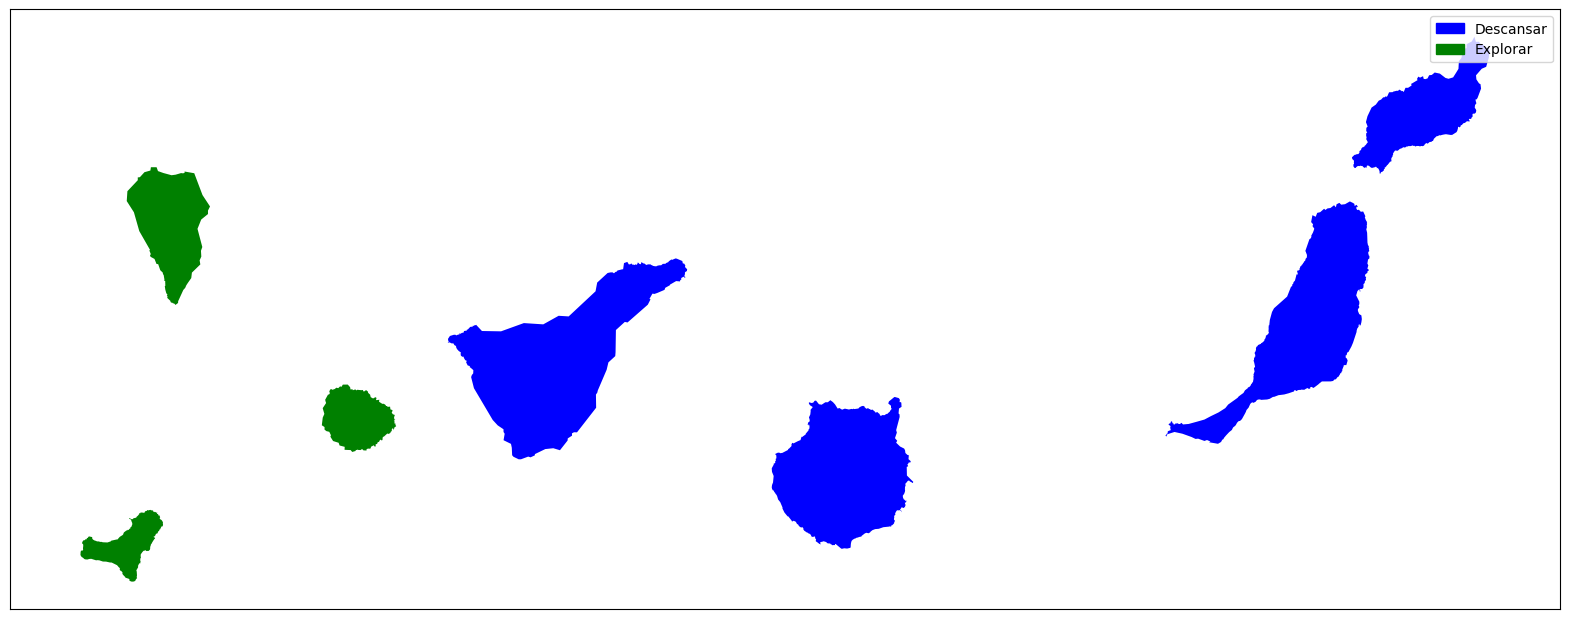

In [ ]:


# Cargar el archivo GeoJSON con los datos geoespaciales de las islas
df_geo = gpd.read_file('.\datos\geoJsonCanarias.json')
df_geo.columns = ['ISLA','name','geometry']

# Combinar el dataframe geoespacial con el dataframe que contiene la información de la motivación principal
df_merged = df_geo.merge(porcentaje_motivacion, on='ISLA')

# Definir los colores para cada motivación
def asignar_color(motivacion):
    # Asigna un color a cada motivación principal
    if motivacion == 'Descansar':
        return 'blue'
    elif motivacion == 'Explorar':
        return 'green'
    elif motivacion == 'Divertirse':
        return 'red'
    elif motivacion == 'Familia':
        return 'orange'
    elif motivacion == 'Aficiones':
        return 'purple'
    else:
        return 'gray'

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(20, 16))

# Iterar sobre las filas del dataframe combinado
for index, row in df_merged.iterrows():
    isla = row['ISLA']
    motivacion = row['MOTIVACION_PRINCIPAL']
    color = asignar_color(motivacion)
    df_filtered = df_geo[df_geo['ISLA'] == isla]
    df_filtered.plot(ax=ax, facecolor=color)

# Configurar la leyenda

motivaciones_label = ['Descansar', 'Explorar']
handles = [plt.Rectangle((0,0),1,1, color=asignar_color(motivacion)) for motivacion in motivaciones_label]
labels = motivaciones_label
plt.legend(handles, labels)

# Mostrar el mapa
ax.set_xticks([])
ax.set_yticks([])
plt.show()

## Referencias 
- [Sunburst Charts in Python](https://plotly.com/python/sunburst-charts/)
- [Snakey Diagram](https://plotly.com/python/sankey-diagram/)